<a href="https://colab.research.google.com/github/thitirat-mnc/credit-card-customer-segmentation/blob/main/CreditCard_customers_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=014f86 size=6> **1) Understand the problem statement and business case** </font>

## <font color=ff6700 size=5> **Customer segmentation** </font>

> <font color=e09f3e size=3>***Targeted Marketing***:</font>
- Enabling businesses to identify distinct groups of customers with similar needs and preferences. <br>
- Tailoring messages and offers to specific customer groups increases relevance and boosts conversion rates.

> <font color=e09f3e size=3>***Personalization***: </font>
- Customizing interactions based on customer preferences fosters stronger connections and loyalty.

> <font color=e09f3e size=3>***Market Understanding***:</font>
- Insights into different customer groups enable businesses to develop products and campaigns that resonate better, gaining a competitive edge.

> <font color=e09f3e size=3>***Resource Optimization***: </font>
- Prioritizing high-potential segments maximizes ROI by allocating resources efficiently.

> <font color=e09f3e size=3>***Competitive Advantage***: </font>
- Providing tailored experiences differentiates businesses and captures market share effectively.



---



# <font color=014f86 size=6> **2) Import libraries and datasets**</font>

In [72]:
!pip install bokeh

In [103]:
!pip install hvplot

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 

## <font color=a67c00 size=5>**Customer Credit Card Dataset Description**</font>

<font color=3a6ea5 size=4> **contains information of 8950 rows of credit card customer** </font>

<font color=ff6700 size=3><pre>
┌───────────────────────────────────────────────────────────────┐
│                                                                 │
│ - **CUSTID:** Identification of Credit Card holder              │
│ - **BALANCE:** Balance amount left in customer's account       │
│               to make purchases                                │
│ - **BALANCE_FREQUENCY:** How frequently the Balance is         │
│                          updated, score between 0 and 1        │
│                          (1 = frequently updated,              │
│                           0 = not frequently updated)          │
│ - **PURCHASES:** Amount of purchases made from account         │
│ - **ONEOFFPURCHASES:** Maximum purchase amount done            │
│                        in one-go                               │
│ - **INSTALLMENTS_PURCHASES:** Amount of purchase done          │
│                               in installment                   │
│ - **CASH_ADVANCE:** Cash in advance given by the user          │
│ - **PURCHASES_FREQUENCY:** How frequently the Purchases        │
│                            are being made, score between 0     │
│                            and 1 (1 = frequently purchased,     │
│                            0 = not frequently purchased)       │
│ - **ONEOFF_PURCHASES_FREQUENCY:** How frequently Purchases     │
│                                   are happening in one-go      │
│                                   (1 = frequently purchased,   │
│                                   0 = not frequently           │
│                                   purchased)                   │
│ - **PURCHASES_INSTALLMENTS_FREQUENCY:** How frequently         │
│                                         purchases in            │
│                                         installments are        │
│                                         being done (1 =         │
│                                         frequently done, 0 =    │
│                                         not frequently done)    │
│ - **CASH_ADVANCE_FREQUENCY:** How frequently the cash          │
│                               in advance being paid            │
│ - **CASH_ADVANCE_TRX:** Number of Transactions made with       │
│                         "Cash in Advance"                      │
│ - **PURCHASES_TRX:** Number of purchase transactions made      │
│ - **CREDIT_LIMIT:** Limit of Credit Card for user              │
│ - **PAYMENTS:** Amount of Payment done by user                 │
│ - **MINIMUM_PAYMENTS:** Minimum amount of payments made        │
│                         by user                               │
│ - **PRC_FULL_PAYMENT:** Percent of full payment paid by user   │
│ - **TENURE:** Tenure of credit card service for user           │
│                                                               │
└───────────────────────────────────────────────────────────────┘
</pre></font>

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Project/2024_03_12_Data Science for Business/resource/2. Marketing Department/Marketing_data.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## <font color=a67c00 size=5>**Dataset Exploration**</font>

<font color=ff6700 size=2><pre>
- Most of the customers have their balance frequently updated (~0.9)
- Most customer are loyal (~11-year tenure)
- Mean balance is 1564
- Purchases average is 1000
- one off purchase average is ~600
- Average purchases frequency is around 0.5
- average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
- Average credit limit ~ 4500
- Percent of full payment is 15%
- Average tenure is 11 years
</pre></font>

In [58]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [9]:
# see who made one off PURCHASES of $40761
# very low CASH_ADVANCE_FREQUENCY (0.083333)
df[df['PURCHASES'] == 49039.570000]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [11]:
# see who made the highest CASH_ADVANCE of $47137
# max CASH_ADVANCE_FREQUENCY (1.0)
# moderate PURCHASES (431.93)
# made 123 cash advance transactions
# Never paid credit card in full
df[df['CASH_ADVANCE']==47137.211760]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

In [299]:
filt = (df['PAYMENTS']>30000) & (df['PURCHASES'] > 20000)
df.loc[(filt)]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
501   13479.288210           1.000000   41050.40          40624.06   
550   11547.520010           1.000000   49039.57          40761.25   
1256   4010.621974           1.000000   40040.71          24543.52   
1604   3391.702180           1.000000   38902.71          33803.84   
5358   6372.182817           1.000000   22101.78          22101.78   
7046   2980.054695           0.818182   26784.62          26514.32   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
501                   426.34      0.000000             0.833333   
550                  8278.32    558.166886             1.000000   
1256                15497.19      0.000000             1.000000   
1604                 5098.87      0.000000             1.000000   
5358                    0.00  19513.474830             0.333333   
7046                  270.30      0.000000             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
501                     0.666667                          0.416667   
550                     1.000000                          0.916667   
1256                    1.000000                          1.000000   
1604                    1.000000                          1.000000   
5358                    0.333333                          0.000000   
7046                    0.500000                          0.083333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
501                 0.000000                 0            157       17000.0   
550                 0.083333                 1            101       22500.0   
1256                0.000000                 0            358       18000.0   
1604                0.000000                 0            195       18000.0   
5358                0.666667                35             40        7500.0   
7046                0.000000                 0             33       30000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
501   36066.75068      15914.484620          0.083333      12  
550   46930.59824       2974.069421          0.250000      12  
1256  33994.72785        703.503256          1.000000      12  
1604  35843.62593        716.027656          1.000000      12  
5358  39461.96580       6764.853481          0.250000      12  
7046  30029.01496      11853.796130          0.750000      12

In [300]:
df.loc[df['CASH_ADVANCE_TRX']==0].shape[0] / df.shape[0]

0.5170949720670391

In [304]:
df.loc[df['CREDIT_LIMIT']<20000].shape[0] / df.shape[0]

0.9974301675977654

In [305]:
df.loc[df['PURCHASES']<20000].shape[0] / df.shape[0]

0.9975418994413408

*   more than 50 % of customers have 0 CASH_ADVANCE_TRX.
*   99 % of customers have less than 20k CREDIT_LIMIT
*   99 % of customers have less than 20k PURCHASES



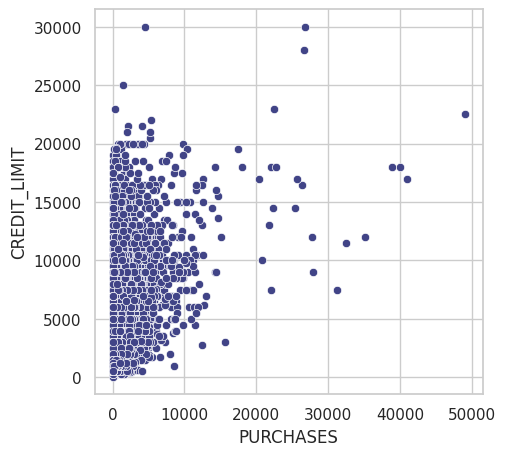

In [307]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='PURCHASES',y='CREDIT_LIMIT', data=df);

# <font color=014f86 size=6> **3) Visualize and explore dataset**  </font>

In [59]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: >

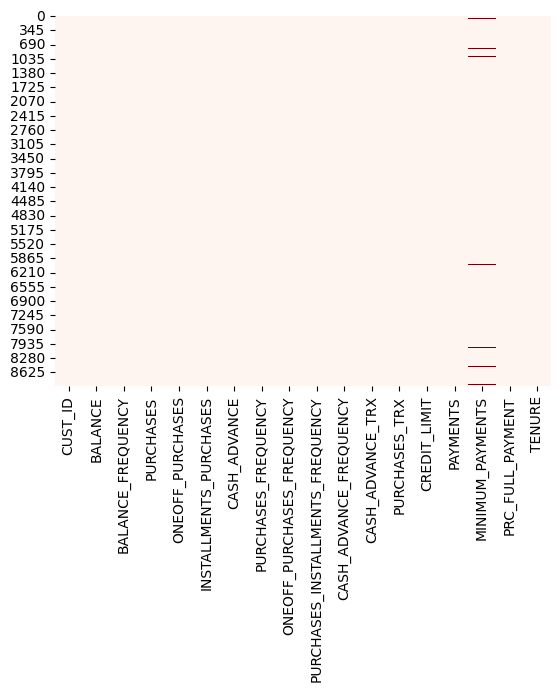

In [15]:
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')

In [60]:
# Fill up the missing elements with median of the 'MINIMUM_PAYMENT'
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].median()

In [61]:
# Fill up the missing elements with median of the 'CREDIT_LIMIT'
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT']= df['CREDIT_LIMIT'].median()

In [62]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

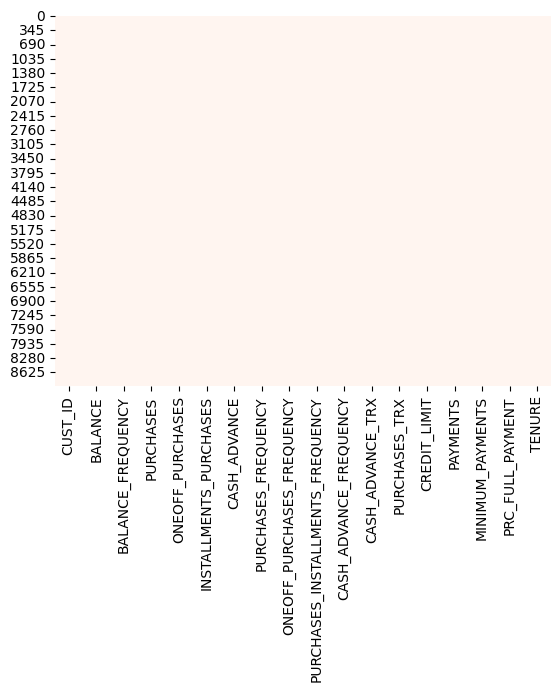

In [20]:
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')

In [22]:
# see if we have duplicated entries in the data
df.duplicated().sum()

0

In [63]:
# drop Customer ID since it has no meaning here
df.drop('CUST_ID', axis=1, inplace=True)

In [24]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [25]:
len(df.columns)

17

In [26]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

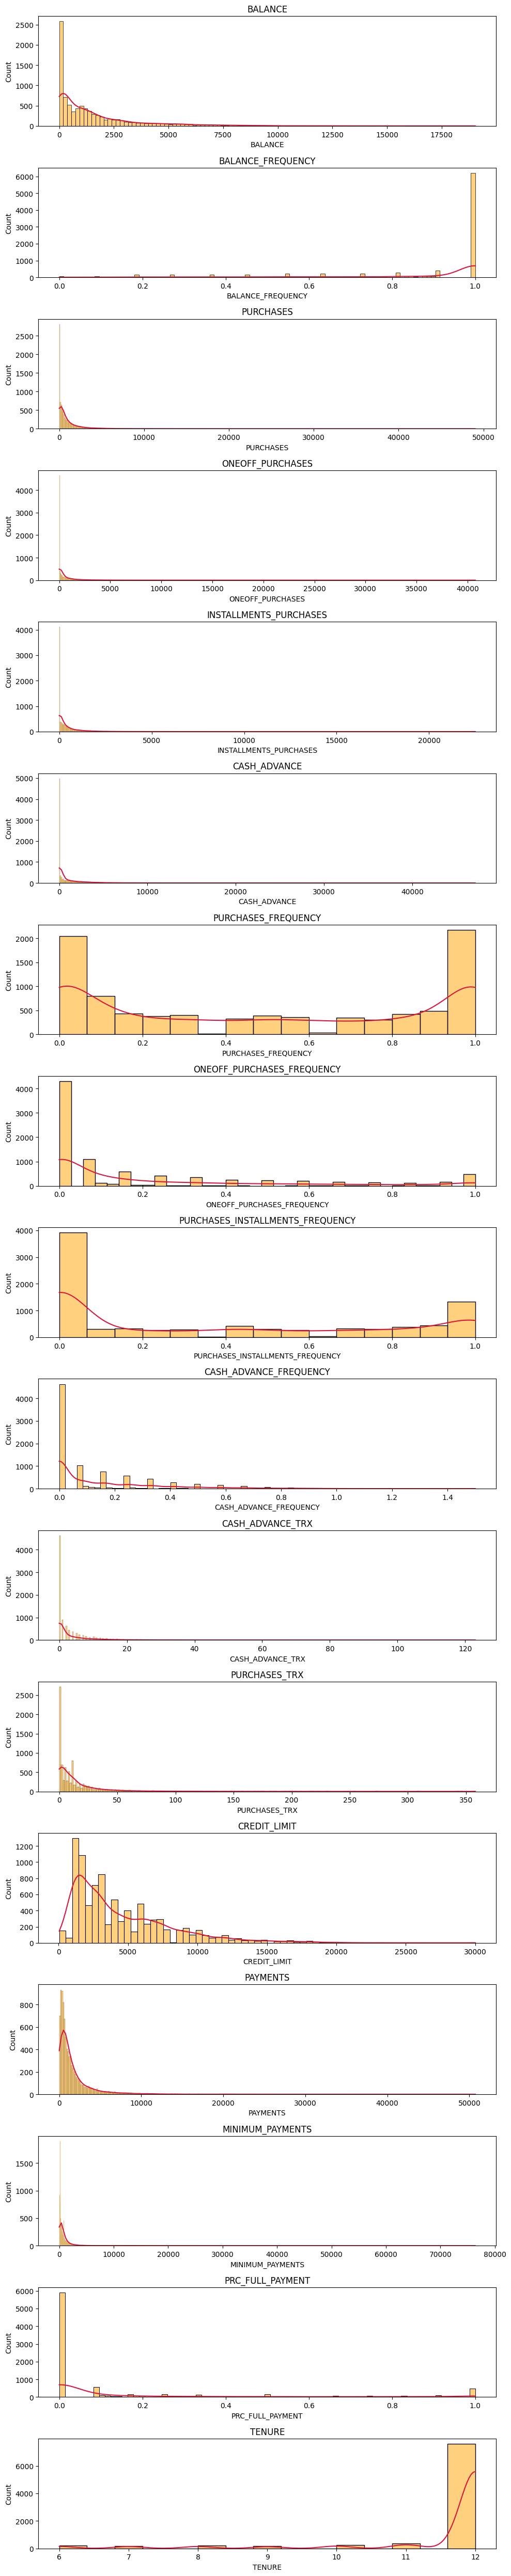

In [40]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

plt.figure(figsize = (10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  ax = sns.histplot(df[df.columns[i]], color='orange', kde=True)
  ax.lines[0].set_color('crimson')
  plt.title(df.columns[i])

plt.tight_layout()


```
Mean balance is $1500
```
> <font color=e9518c size=4>**'BALANCE_FREQUENCY'** </font>for most customers is updated frequently ~1

> For <font color=e9518c size=4>**'PURCHASES_FREQUENCY'**</font>, there are two distinct group of customers

> For<font color=e9518c size=4>**'ONEOFF_PURCHASES_FREQUENCY'** and **'PURCHASES_INSTALLMENT_FREQUENCY'**</font>, most users don't do one off puchases or installment purchases frequently

> Very small number of customers pay their balance in full <font color=e9518c size=4>**'PRC_FULL_PAYMENT'**</font> ~0

```
Credit limit average is around $4500
```

> Most customers are <font color=e9518c size=4>**~11 years tenure**</font>

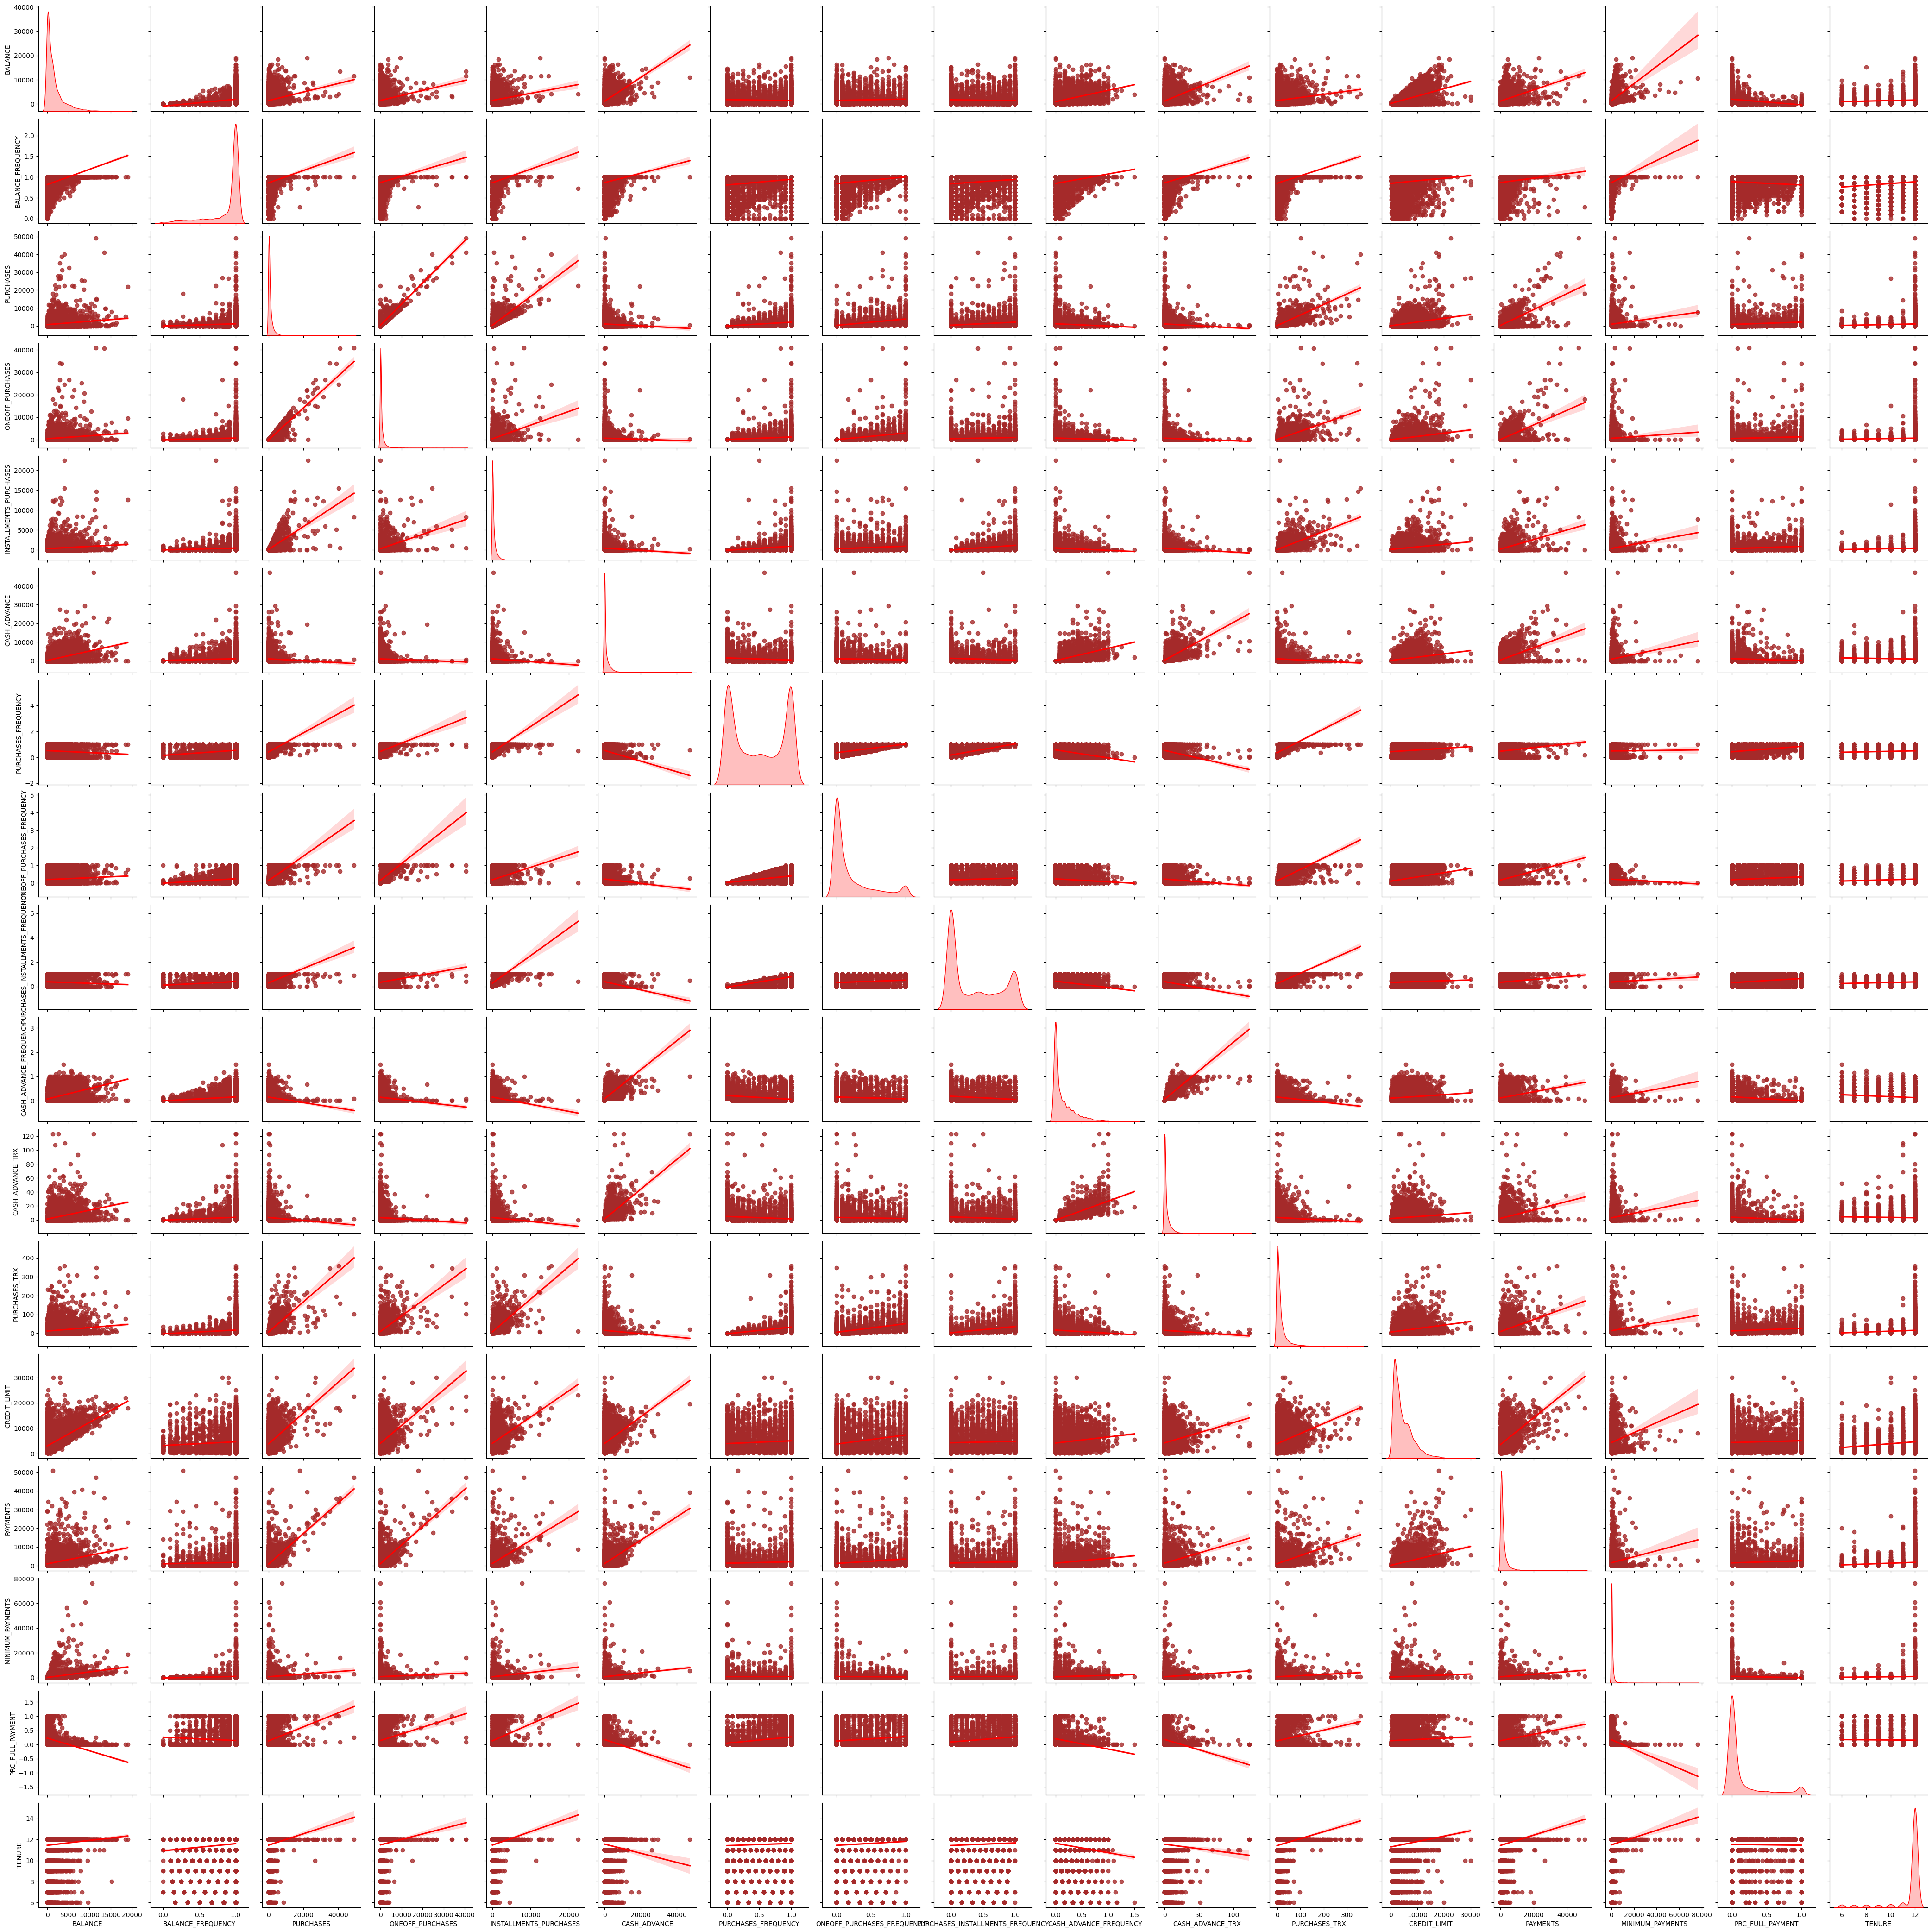

In [102]:
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
sns.pairplot(df, kind='reg', diag_kind='kde',
             diag_kws={'color':'red'},
             plot_kws={'line_kws':{'color':'red'}, 'color':'brown'})

**Insights**
* 'PURCHASES' have high correlation between one-off purchases, installment
purchases, purchase transactions, credit limit and payments.
* Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


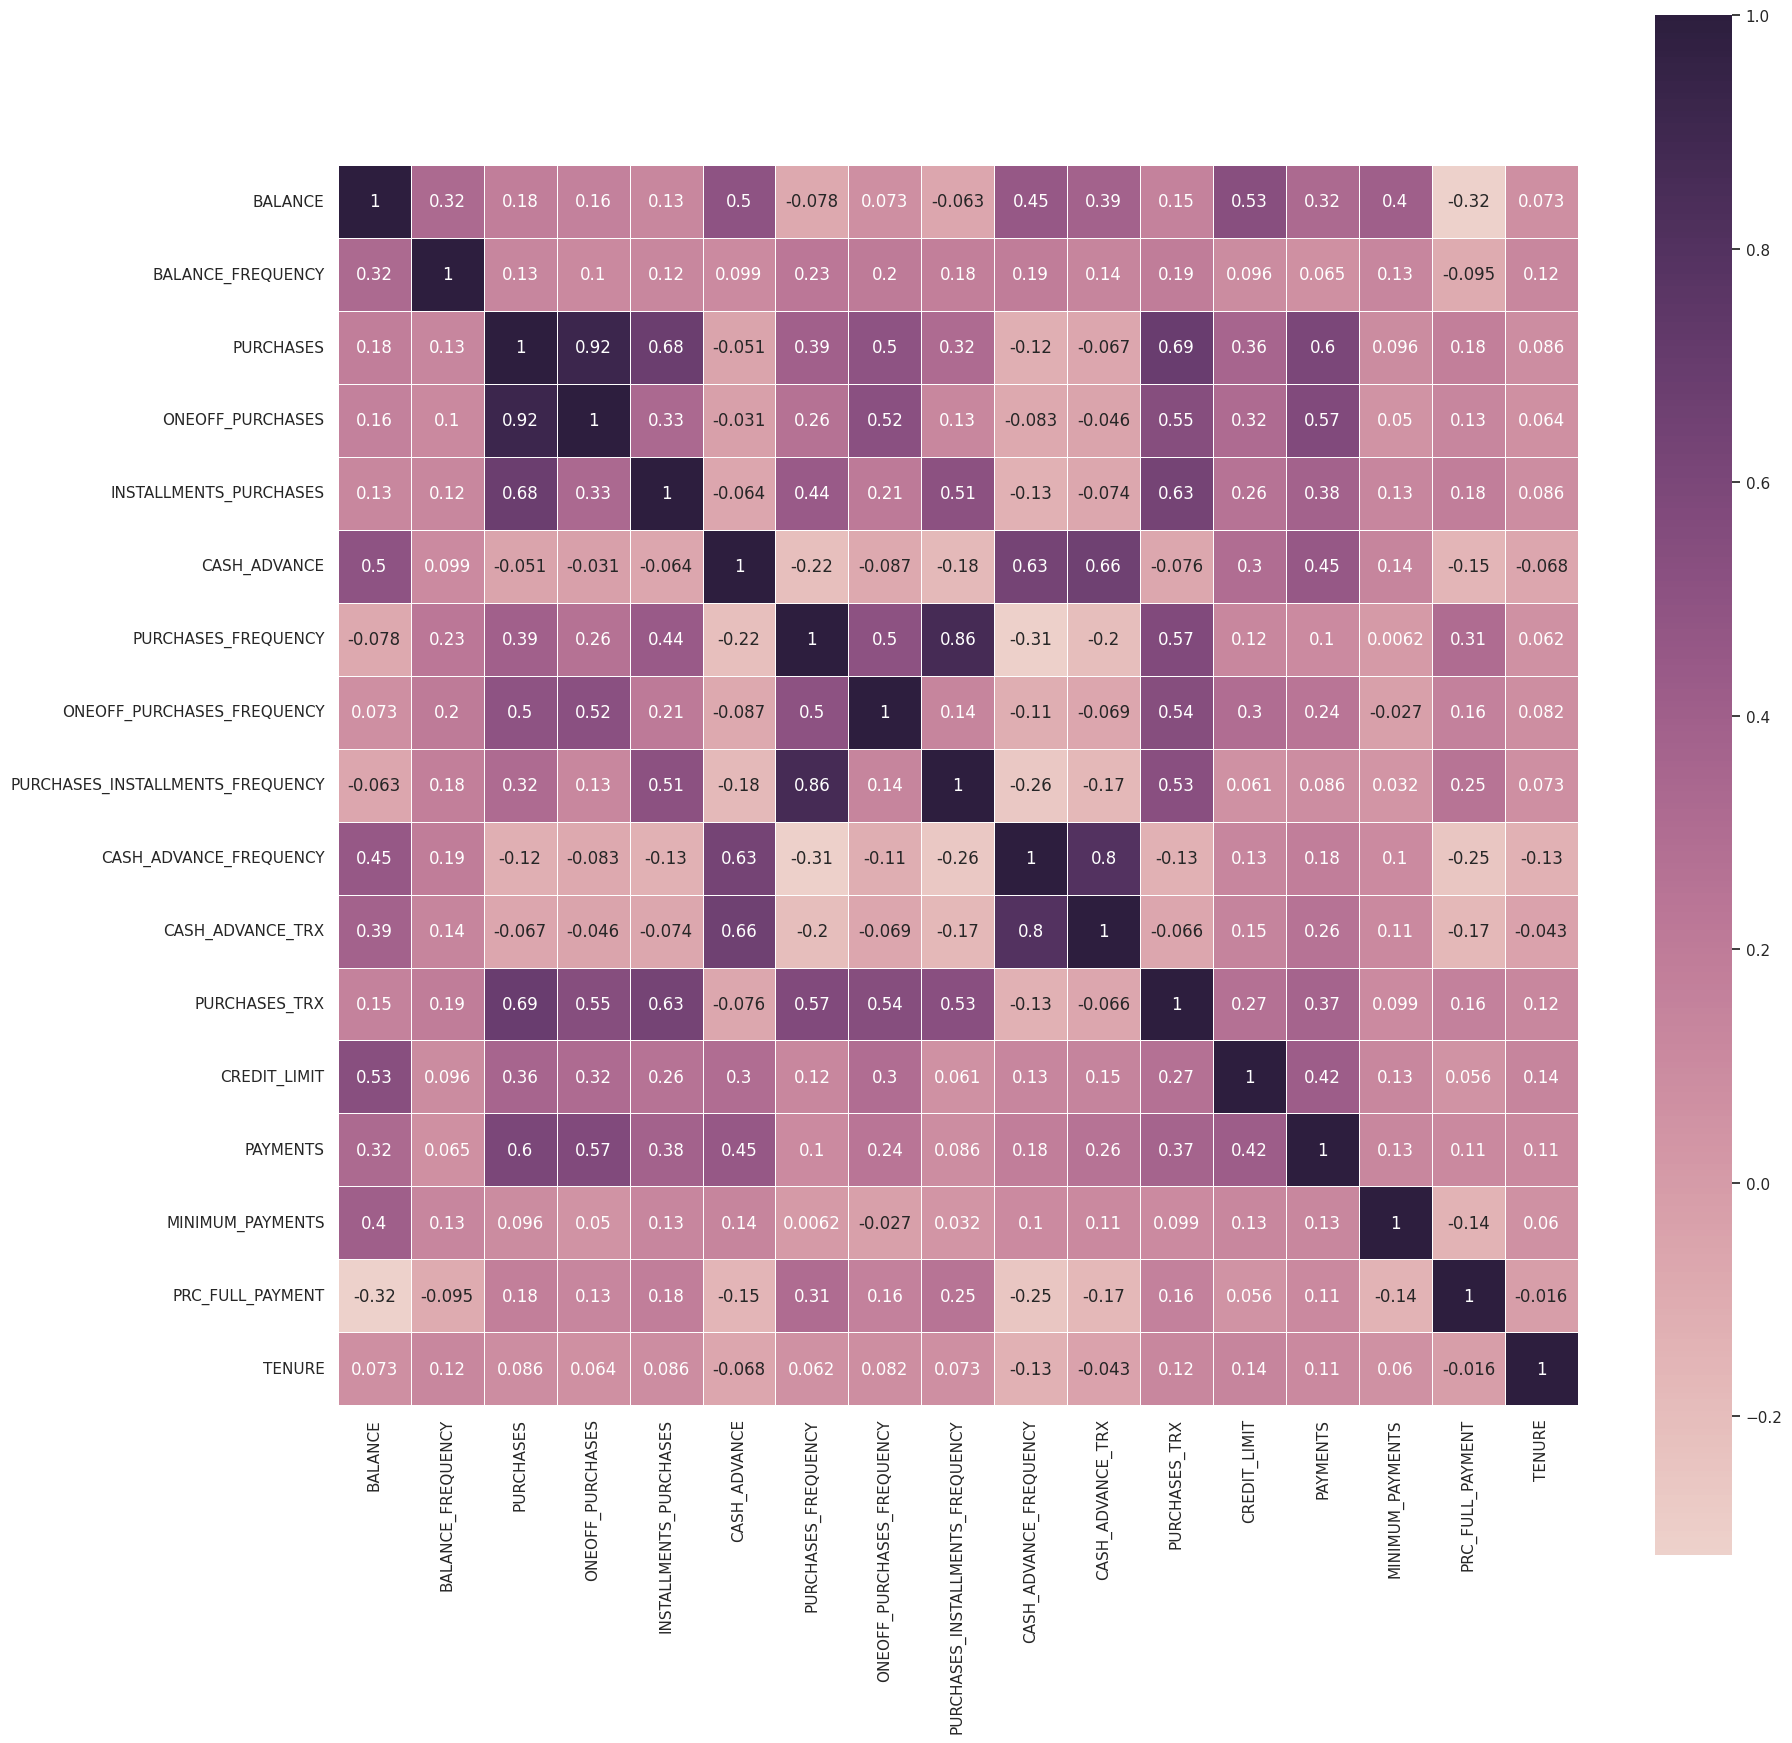

In [284]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
#cmap = sns.diverging_palette(150, 0, as_cmap=True)
cmap=sns.cubehelix_palette(as_cmap=True)
sns.heatmap(correlations, annot=True, cmap=cmap, square=True, linewidths=0.5)
plt.show()

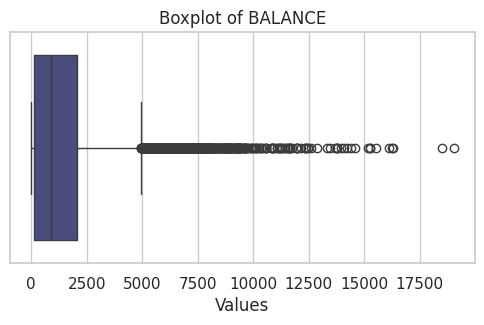

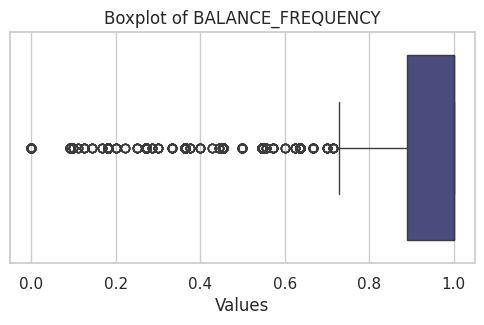

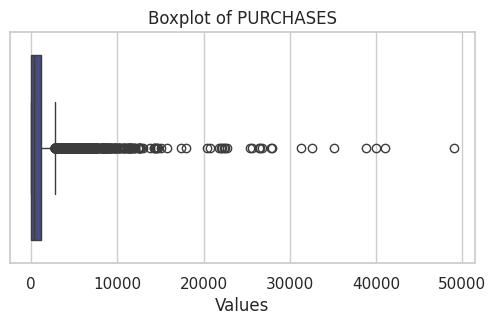

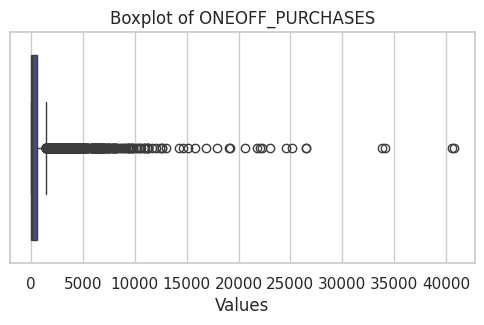

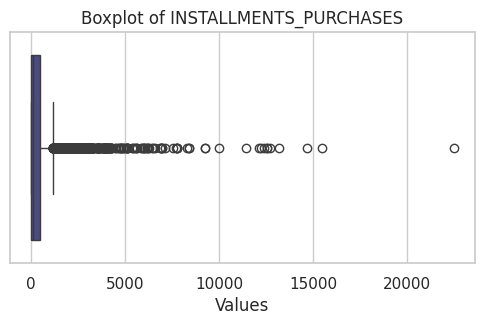

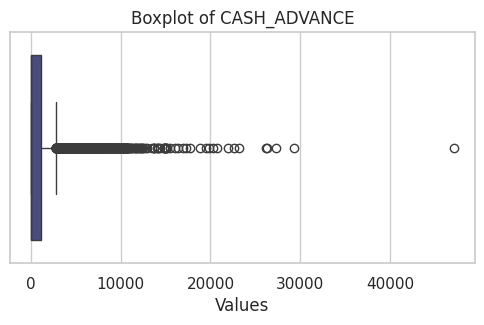

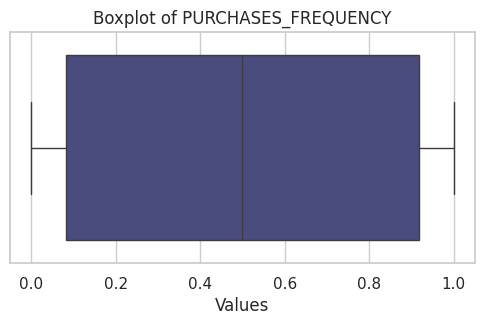

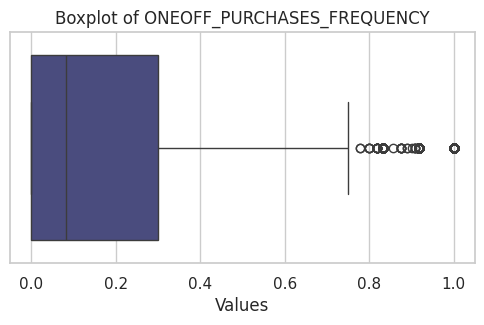

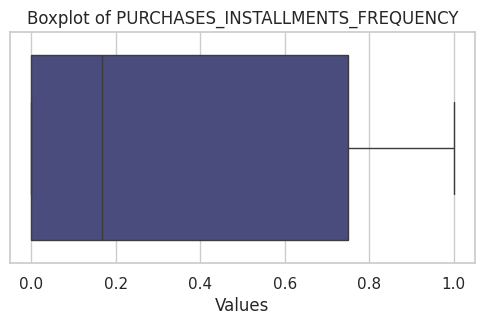

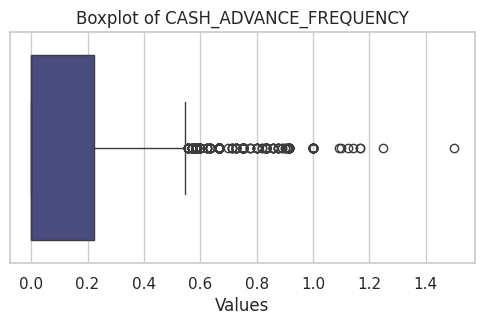

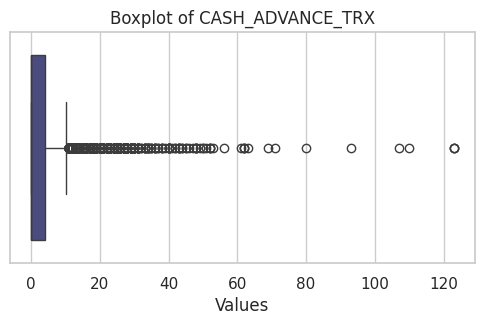

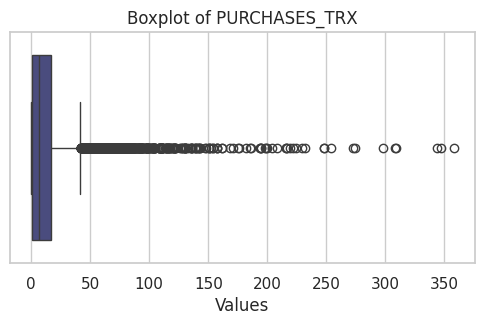

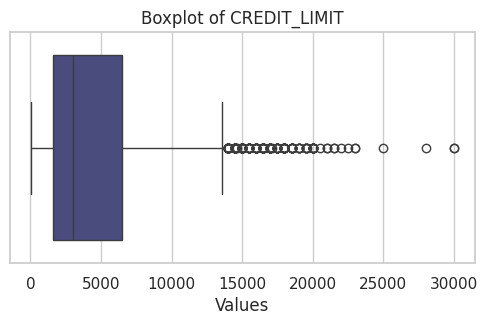

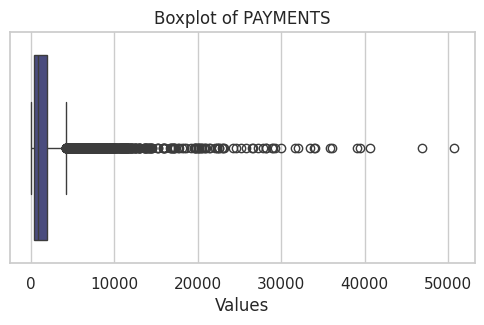

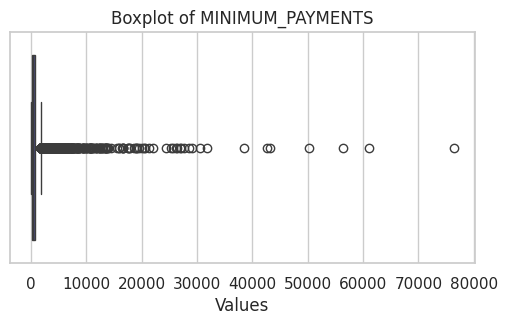

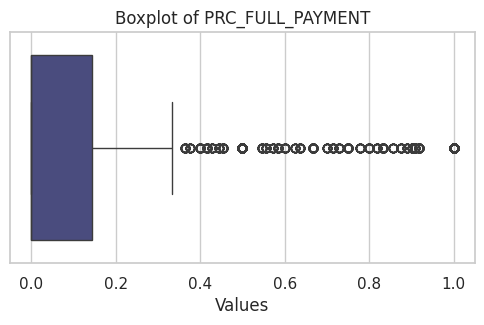

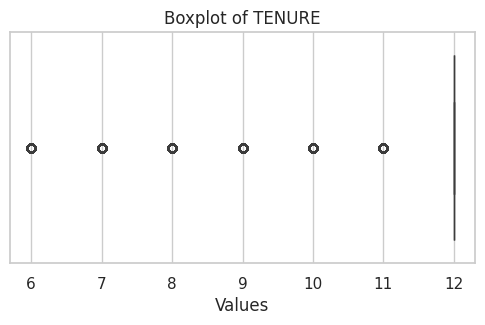

In [297]:
sns.set_style('whitegrid')
for column in df.columns:
    plt.figure(figsize=(6, 3))  # Set figure size
    sns.boxplot(x=df[column], orient='h')  # Create horizontal boxplot
    plt.title(f"Boxplot of {column}")  # Set title
    plt.xlabel("Values")  # Set x-label
    plt.show()  # Show plot

# <font color=014f86 size=6>**4) find the optimal number of clusters using elbow method**</font>







## <font color=a67c00 size=5>**Data Scaling**</font>

In [105]:
# Let's scale the data first
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(df)

In [106]:
creditcard_df_scaled.shape

(8950, 17)

In [107]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

## <font color=a67c00 size=5>**Elbow Method**</font>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

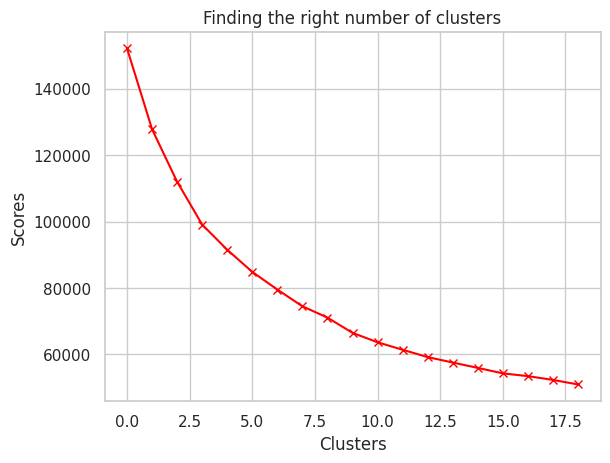

In [311]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-', color = 'r')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.

###**alternatively Scaling the features by zscore**

In [313]:
from scipy.stats import zscore
df_z = df.apply(zscore)
df_z = pd.DataFrame(df_z,columns=df.columns)

In [314]:
df_z.shape

(8950, 17)

In [315]:
df_z

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960378   
1                   0.573963          0.110074      -0.591796      0.688678   
2                  -0.675349         -0.476070      -0.109020      0.826100   
3                  -0.258913         -0.329534      -0.551565      0.826100   
4                  -0.675349         -0.476070      -0.551565     -0.905410   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960378   
8946               -0.675349         -0.476070      -0.350408     -0.960378   
8947               -0.675349         -0.476070      -0.390639     -0.960378   
8948                0.157527         -0.182998      -0.591796     -1.097800   
8949                0.990398         -0.182998       0.333524     -0.905410   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979         -0.302400         -0.525551  0.360680  
1     0.818642          0.097500          0.234227  0.360680  
2    -0.383805         -0.093293         -0.525551  0.360680  
3    -0.598688         -0.228307         -0.525551  0.360680  
4    -0.364368         -0.257266         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217         -0.341250          1.183951 -4.122768  
8946 -0.503396         -0.228307         -0.525551 -4.122768  
8947 -0.570615         -0.326875          0.329200 -

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

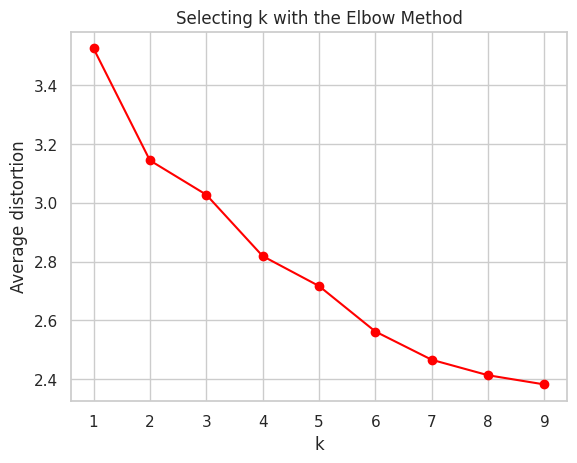

In [316]:
clusters = range(1,10)

meanDistortions = []

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(df_z)
    predict=km.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z,km.cluster_centers_, 'euclidean'), axis=1)) /
                           df_z.shape[0])

plt.plot(clusters, meanDistortions, 'ro-')

plt.title('Selecting k with the Elbow Method')

plt.xlabel('k');

plt.ylabel('Average distortion');

###**alternatively look at the silhouette_scores for number of cluster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

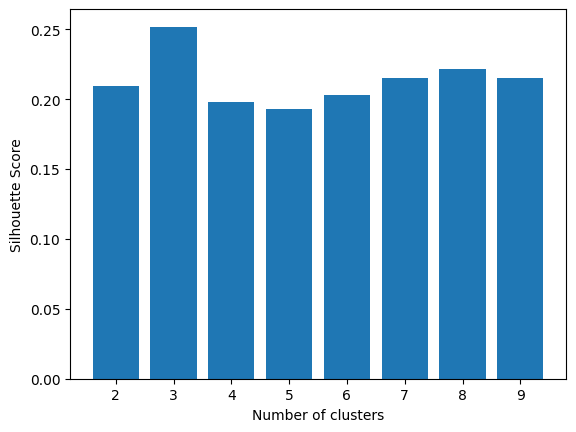

In [124]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

for n_cluster in range(2, 10):
    cluster_labels = KMeans(n_clusters=n_cluster).fit_predict(creditcard_df_scaled)
    silhouette_scores.append(silhouette_score(creditcard_df_scaled, cluster_labels))

# Plotting a bar graph to compare the results
k = range(2, 10)
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.show()

# <font color=014f86 size=6>**5) Apply K-MEANS Method**</font>

In [319]:
kmeans = KMeans(3)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [320]:
kmeans.cluster_centers_.shape

(3, 17)

In [321]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.367704         -0.177985 -0.232801        -0.204348   
1  0.314114          0.439638  1.531974         1.284634   
2  1.166484          0.343086 -0.288414        -0.206864   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.174929    -0.309195           -0.062957   
1               1.261815    -0.249132            1.142928   
2              -0.301975     1.376262           -0.639290   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.234890                        -0.048519   
1                   1.565660                         0.955627   
2                  -0.306361                        -0.550309   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.334273        -0.298675     -0.243635    -0.335803   
1              -0.361799        -0.253350      1.684394     0.888459   
2               1.559110         1.339215     -0.364330     0.601849   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.284471        -0.138000         0.007407 -0.028628  
1  0.838730         0.161695         0.495688  0.303013  
2  0.443537         0.404039        -0.410221 -0.123765

In [322]:
# In order to understand what these numbers mean, perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0   799.129821          0.835108   505.821921       253.260866   
1  2218.277313          0.981417  4276.291527      2724.667303   
2  3992.413457          0.958545   387.004011       249.085895   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             252.881748   330.473843            0.465083   
1            1552.111633   456.430228            0.949063   
2             137.995507  3864.956477            0.233773   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.132385                         0.345155   
1                   0.669524                         0.744228   
2                   0.111064                         0.145730   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.068253         1.210587      8.653978  3272.483840   
1               0.062745         1.519903     56.577579  7726.888708   
2               0.447138        12.387985      5.653942  6684.076687   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   909.627374       522.998581         0.155881  11.479007  
1  4161.185424      1222.086027         0.298695  11.922827  
2  3017.139588      1787.392584         0.033732  11.351690



---



In [245]:
labels.shape

(8950,)

In [246]:
labels.max()

2

In [247]:
labels.min()

0

In [248]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [324]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster1 = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        312.343947          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

In [323]:
creditcard_df_cluster1_z = pd.concat([df_z, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster1_z.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  cluster  
0 -0.528979         -0.302400         -0.525551  0.36068        0  
1  0.818642          0.097500          0.234227  0.36068        2  
2 -0.383805         -0.093293         -0.525551  0.36068        0  
3 -0.598688         -0.228307         -0.525551  0.36068        0  
4 -0.364368         -0.257266         -0.525551  0.36068        0

In [333]:
# Count the number of data points in each cluster
cluster_counts = creditcard_df_cluster1['cluster'].value_counts()

# Calculate the total number of data points
total_points = len(creditcard_df_cluster1)

# Calculate the percentage of data points in each cluster
percentage_in_cluster = (cluster_counts / total_points) * 100

print(f"Percentage of data points in each cluster:\n{percentage_in_cluster}")

Percentage of data points in each cluster:
0    68.368715
2    17.854749
1    13.776536
Name: cluster, dtype: float64


In [283]:
creditcard_df_cluster1.to_csv('creditcard_cluster_ver1.csv')

In [ ]:
for column in df.columns:
    sns.boxplot(df[column])
    plt.show()

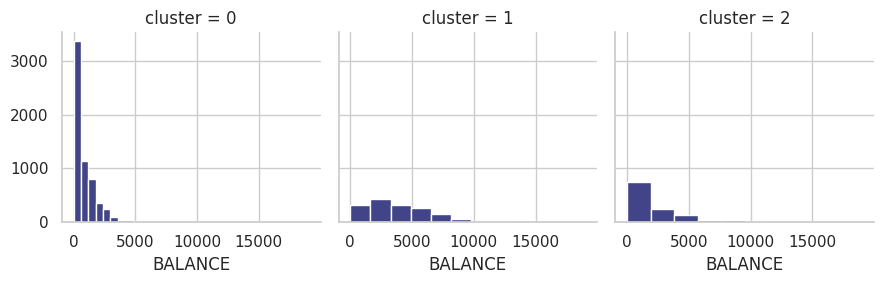

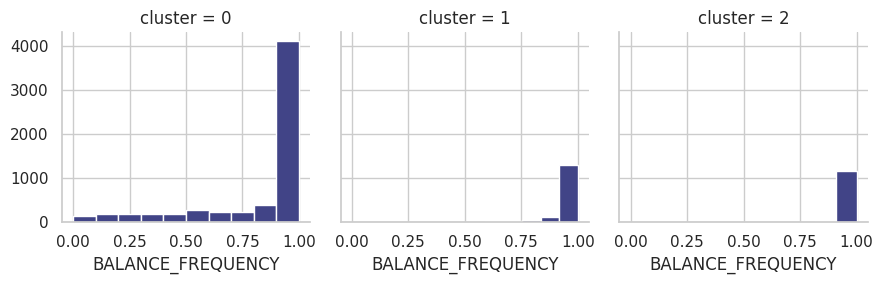

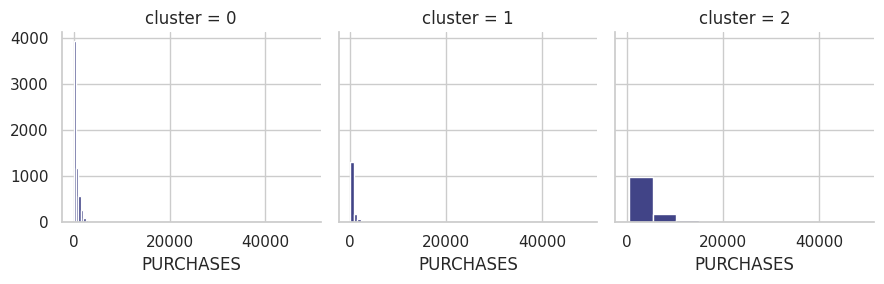

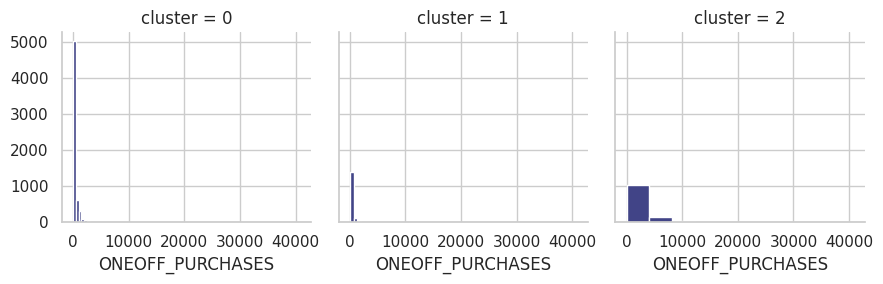

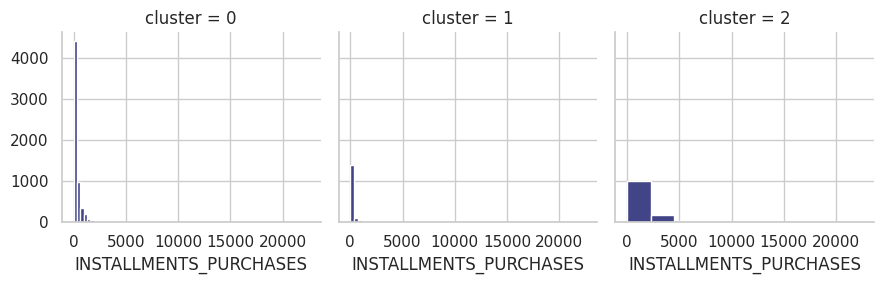

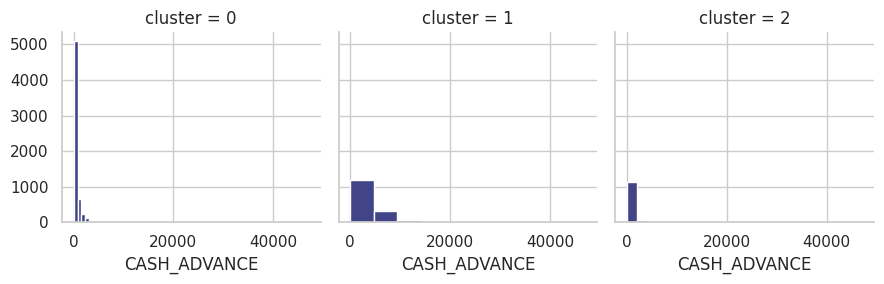

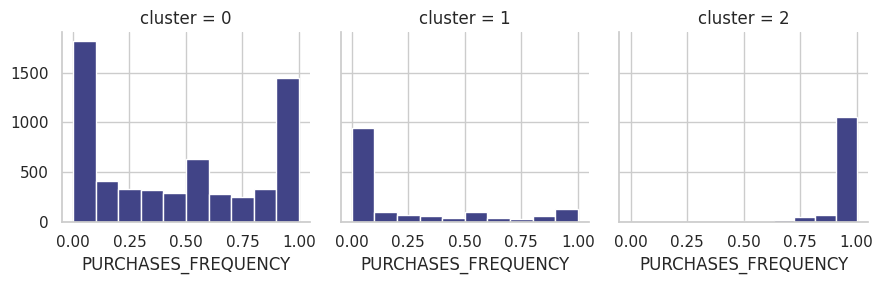

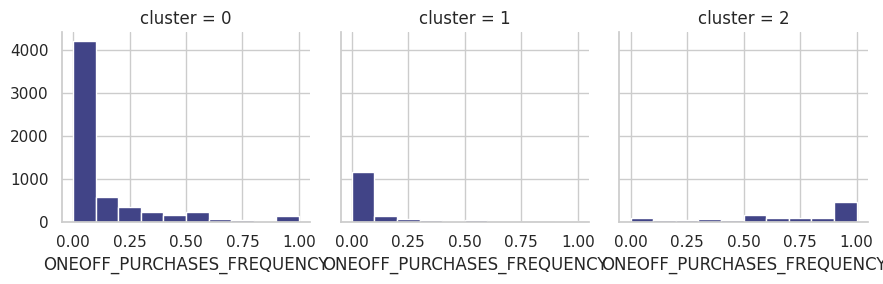

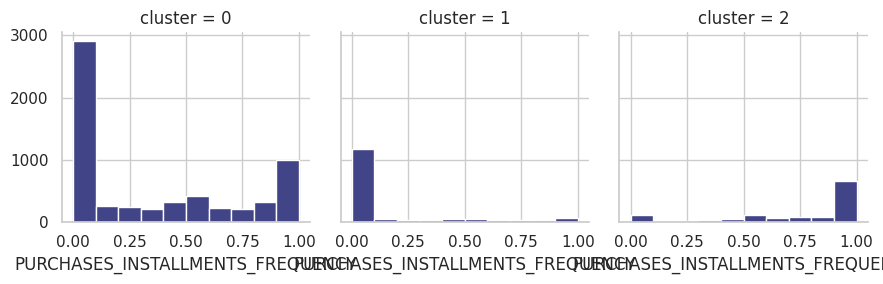

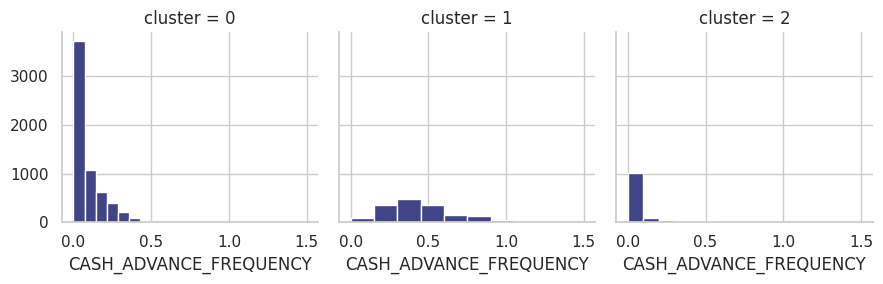

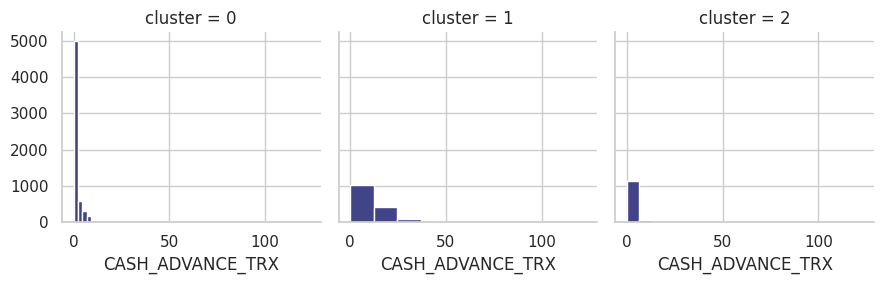

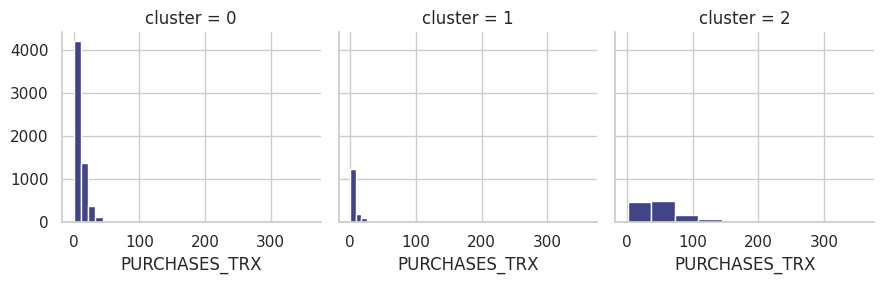

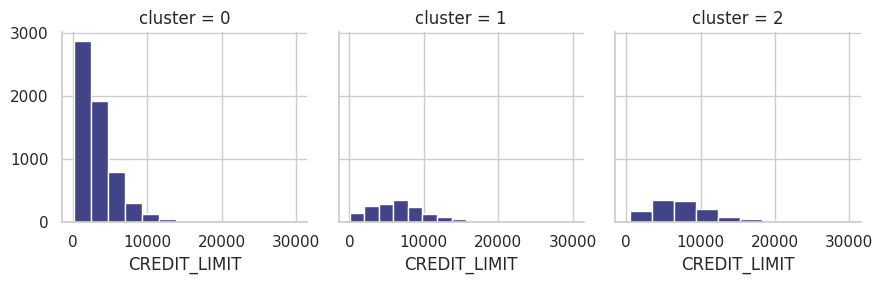

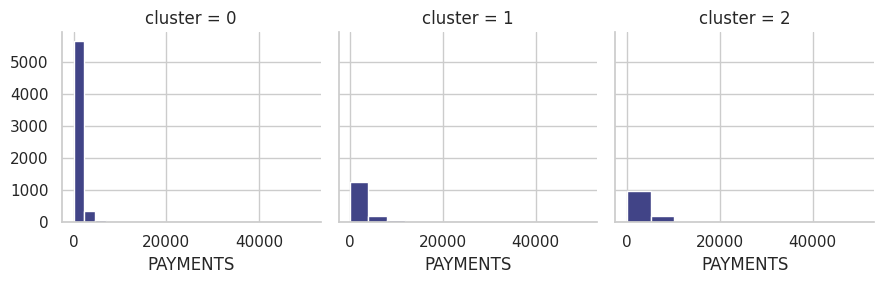

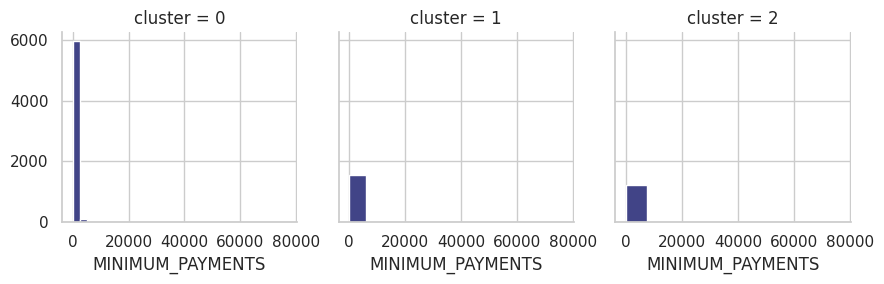

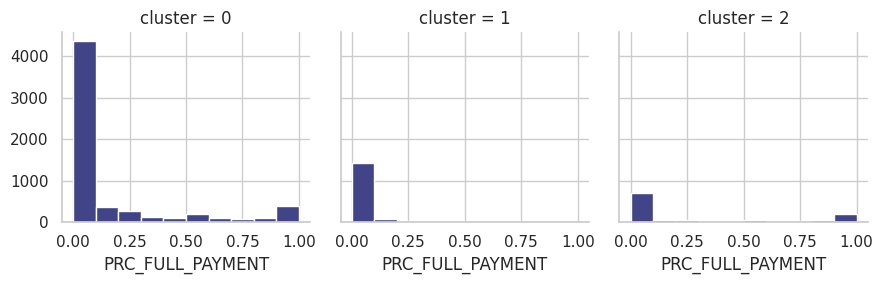

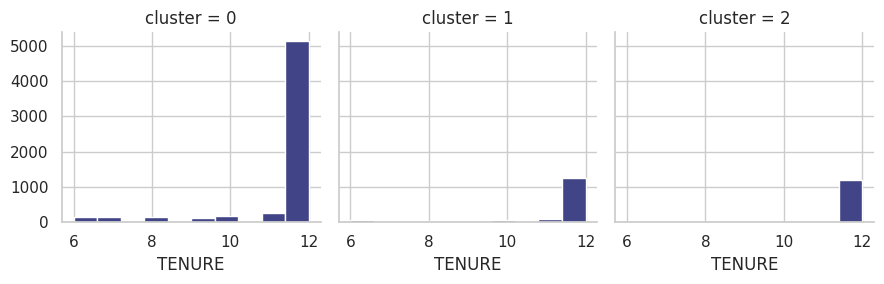

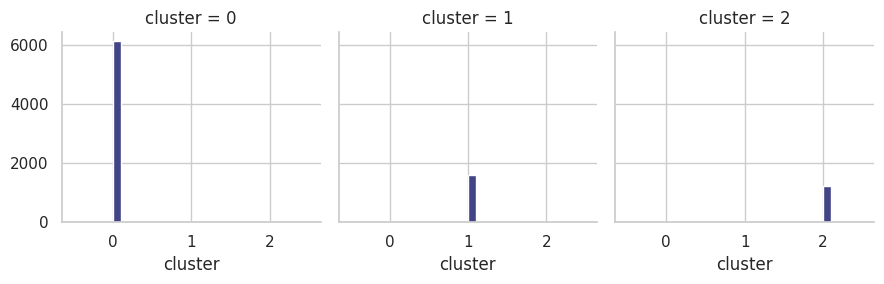

In [274]:
# Plot the histogram of various clusters
for c in creditcard_df_cluster1:
    sns.set_style('whitegrid')
    grid= sns.FacetGrid(creditcard_df_cluster1, col='cluster')
    grid.map(plt.hist, c)

In [325]:
creditcard_df_cluster1['cluster'] = creditcard_df_cluster1['cluster'].astype('category')
creditcard_df_cluster1_z['cluster'] = creditcard_df_cluster1_z['cluster'].astype('category')

## <font color=a67c00 size=5>**Insight Drawn From Model**</font>
<font color=ff6700 size=4> **First Customers cluster (Conservative Spenders)** </font>: account for 68.36% of the customers

> maintain very low balance, low purchases, low and infrequent cash advancement, moderate purchase frequency, low payment, <br> low minimum payment, low credit limit
 <br>

<font color=ff6700 size=4> **Second Customers cluster (Frequent Purchasers)** </font>: account for 13.77% of the customers,

> moderately high balance, very high purchases (and one-off purchase, installment purchase), very frequent purchases, <br>
low and infrequent cash advance, high credit limit, and high payment
<br>

<font color=ff6700 size=4> **Third Customers cluster (Revolvers / High Balance / Cash Advancement)**</font>: account for 17.84% of the customers

> use credit card as a loan (most lucrative sector)
<br> very high balance, very low and infrequent purchases, very high and frequent cash advance, 	high minimum payment <br> and high credit limit

# <font color=014f86 size=6>**6) Apply PCA (PRINCIPAL COMPONENT ANALYSIS) and visualize the results**</font>

In [336]:
from sklearn.decomposition import PCA

X = creditcard_df_scaled

# Initialize PCA with desired number of components
pca = PCA(n_components=X.shape[1])  # Use all components initially

# Fit PCA to the data
pca.fit(X)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio for component {i+1}: {ratio:.4f}")

Explained variance ratio for component 1: 0.2730
Explained variance ratio for component 2: 0.2031
Explained variance ratio for component 3: 0.0881
Explained variance ratio for component 4: 0.0748
Explained variance ratio for component 5: 0.0622
Explained variance ratio for component 6: 0.0574
Explained variance ratio for component 7: 0.0488
Explained variance ratio for component 8: 0.0430
Explained variance ratio for component 9: 0.0380
Explained variance ratio for component 10: 0.0308
Explained variance ratio for component 11: 0.0237
Explained variance ratio for component 12: 0.0177
Explained variance ratio for component 13: 0.0143
Explained variance ratio for component 14: 0.0122
Explained variance ratio for component 15: 0.0101
Explained variance ratio for component 16: 0.0027
Explained variance ratio for component 17: 0.0000


In [337]:
# Obtain the principal components
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68364906, -1.0722418 ,  0.47570363],
       [-1.13408203,  2.50915366,  0.60177959],
       [ 0.96939637, -0.38357285,  0.09079651],
       ...,
       [-0.92898631, -1.80804907, -0.45807067],
       [-2.33784696, -0.65361518,  0.98315216],
       [-0.55802679, -0.40064794,  1.0336877 ]])

In [339]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2','pca3'])
pca_df.head()

pca1      pca2      pca3
0 -1.683649 -1.072242  0.475704
1 -1.134082  2.509154  0.601780
2  0.969396 -0.383573  0.090797
3 -0.888222  0.004644  1.500008
4 -1.600020 -0.683793  0.347859

In [340]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2      pca3  cluster
0 -1.683649 -1.072242  0.475704        0
1 -1.134082  2.509154  0.601780        2
2  0.969396 -0.383573  0.090797        0
3 -0.888222  0.004644  1.500008        0
4 -1.600020 -0.683793  0.347859        0

## <font color=a67c00 size=5>**For PCA = 2**</font>


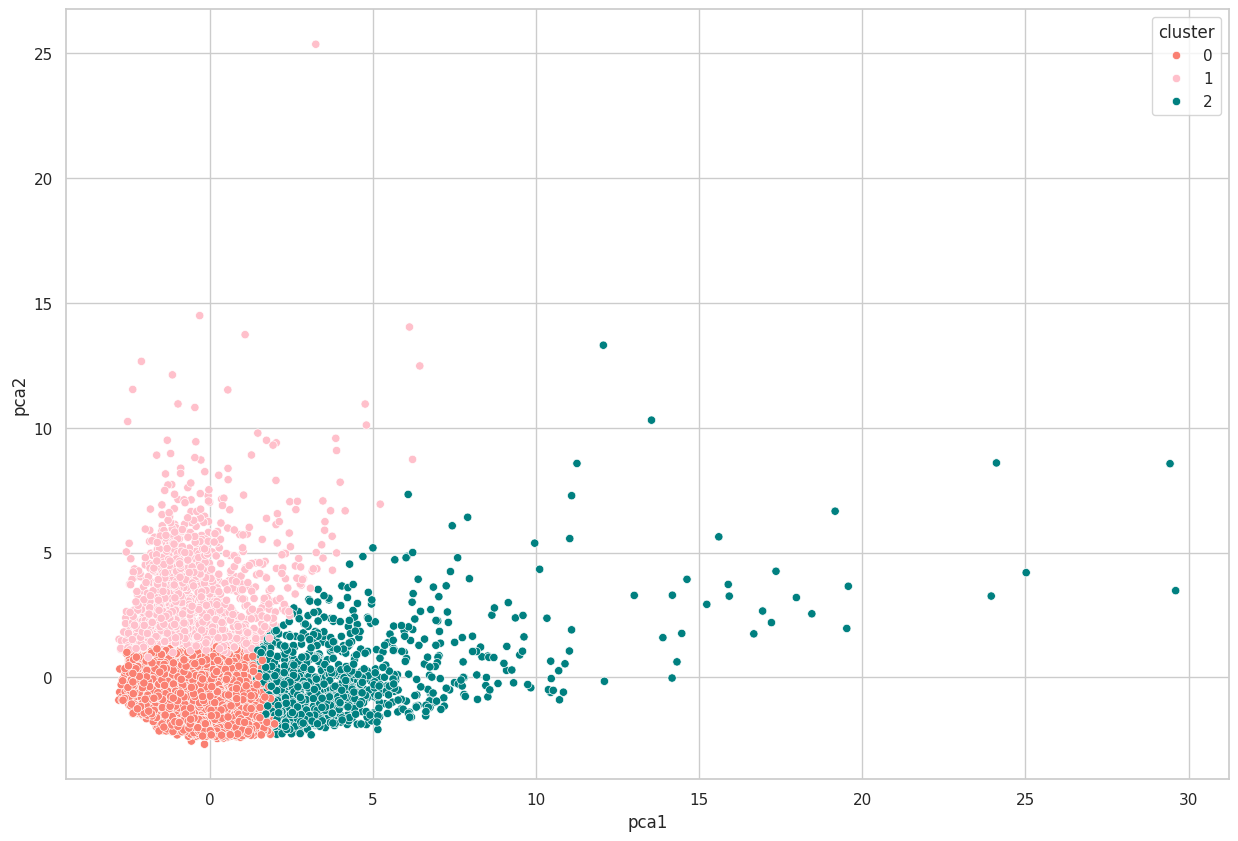

In [256]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['salmon','pink','teal'])
plt.show()

In [342]:
import plotly.express as px

# Assuming you have a DataFrame named pca_df with columns 'pca1', 'pca2', and 'cluster'

fig = px.scatter(pca_df, x='pca1', y='pca2', color='cluster',
                 title='PCA Scatter Plot',
                 labels={'pca1': 'Principal Component 1', 'pca2': 'Principal Component 2'},
                 hover_data=[pca_df.index])  # Add index as hover data if needed

fig.show()

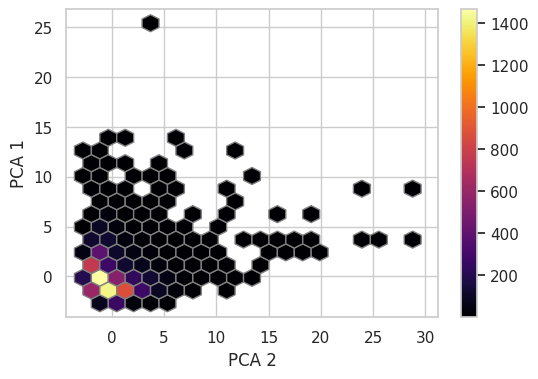

In [258]:
fig, ax = plt.subplots(figsize=(6,4))
hb = ax.hexbin(pca_df["pca1"], pca_df["pca2"],
               gridsize=20, edgecolors='grey',
               cmap='inferno', mincnt=1)
ax.set_axisbelow(True)
ax.set_xlabel('PCA 2')
ax.set_ylabel('PCA 1')
cb = fig.colorbar(hb, ax=ax)
plt.savefig('Scatter04.png', dpi=500, bbox_inches='tight')
plt.show()

## <font color=a67c00 size=5>**For PCA = 3**</font>

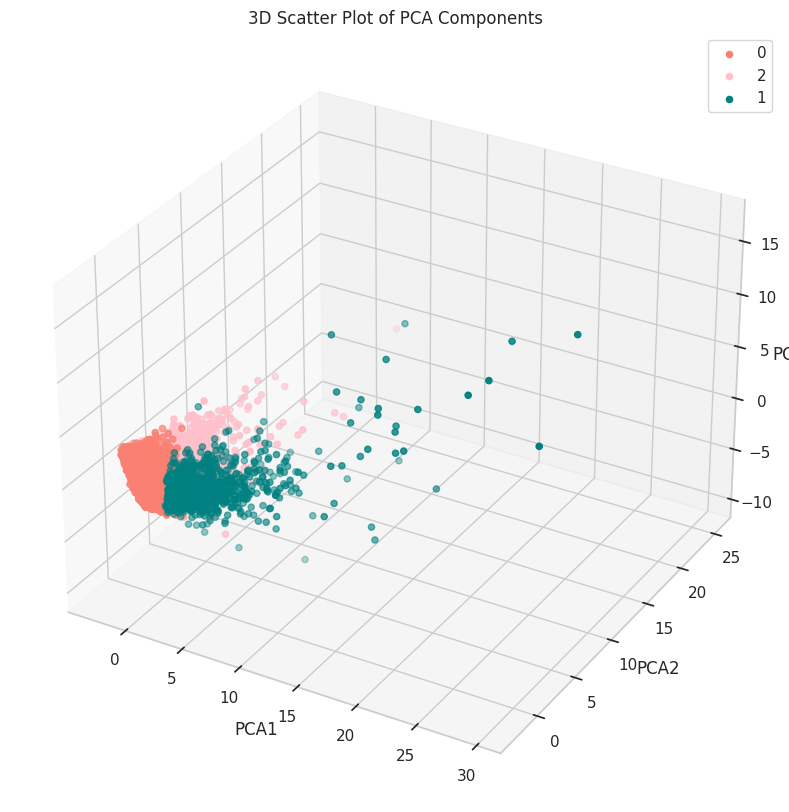

In [341]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

# Scatter plot
for cluster, color in zip(pca_df['cluster'].unique(), ['salmon', 'pink', 'teal']):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    ax.scatter3D(cluster_data['pca1'], cluster_data['pca2'], cluster_data['pca3'], c=color, label=cluster)

# Set labels and title
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D Scatter Plot of PCA Components')

# Add legend
plt.legend()

# Show plot
plt.show()

In [345]:
fig = px.scatter_3d(pca_df, x='pca1', y='pca2', z='pca3', color='cluster',
                    title='PCA 3D Scatter Plot',
                    labels={'pca1': 'Principal Component 1', 'pca2': 'Principal Component 2', 'pca3': 'Principal Component 3'},
                    hover_data=[pca_df.index])  # Add index as hover data if needed

fig.show()

# <font color=014f86 size=6>**7)  Apply Autoencoders for dimensionality reduction**</font>

In [238]:
from tensorflow import keras
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [259]:
creditcard_df_scaled.shape

(8950, 17)

In [260]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 9s 80ms/step - loss: 0.5417
Epoch 2/25
70/70 [==============================] - 5s 67ms/step - loss: 0.3398
Epoch 3/25
70/70 [==============================] - 6s 80ms/step - loss: 0.2718
Epoch 4/25
70/70 [==============================] - 5s 76ms/step - loss: 0.2278
Epoch 5/25
70/70 [==============================] - 4s 62ms/step - loss: 0.1988
Epoch 6/25
70/70 [==============================] - 6s 83ms/step - loss: 0.1922
Epoch 7/25
70/70 [==============================] - 5s 72ms/step - loss: 0.1782
Epoch 8/25
70/70 [==============================] - 5s 69ms/step - loss: 0.1704
Epoch 9/25
70/70 [==============================] - 6s 88ms/step - loss: 0.1647
Epoch 10/25
70/70 [==============================] - 5s 65ms/step - loss: 0.1324
Epoch 11/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1186
Epoch 12/25
70/70 [==============================] - 6s 86ms/step - loss: 0.1034
Epoch 13/25
70/70 [==================

In [261]:
autoencoder.save_weights('autoencoder.h5')

In [262]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 8ms/step


In [263]:
pred.shape

(8950, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

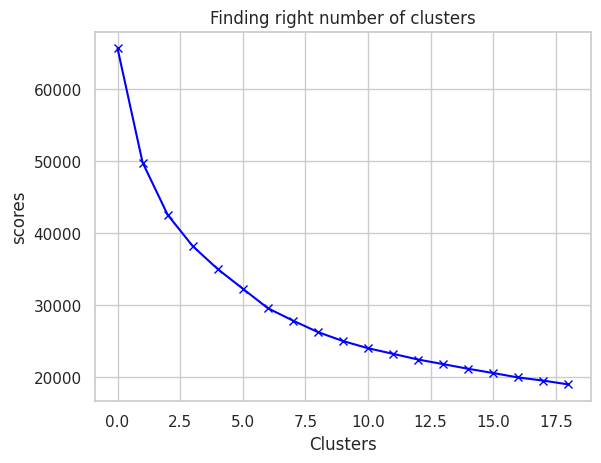

In [365]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

<ipython-input-265-7fa05fd9a6a2>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-265-7fa05fd9a6a2>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'b')


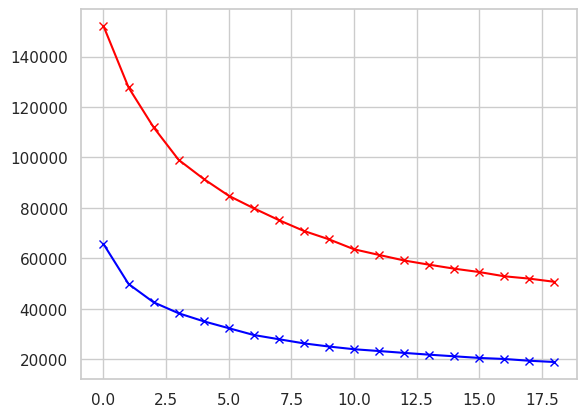

In [265]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'b')

In [266]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [276]:
kmeans.cluster_centers_.shape

(4, 17)

In [277]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.954485          0.462694  3.125845         2.713251   
1 -0.265074         -0.368498 -0.343078        -0.230403   
2 -0.321755          0.242492  0.109083         0.000939   
3  1.459571          0.384642 -0.234654        -0.164025   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               2.406470    -0.155091            1.136338   
1              -0.387712    -0.182075           -0.797566   
2               0.255974    -0.366732            0.983944   
3              -0.253579     1.689346           -0.504596   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   1.798653                         1.065918   
1                  -0.389301                        -0.714084   
2                   0.317283                         0.874358   
3                  -0.213017                        -0.449811   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.319096        -0.170458      3.003251     1.429914   
1              -0.101161        -0.164543     -0.474834    -0.334233   
2              -0.463030        -0.360443      0.297022    -0.077030   
3               1.747275         1.618647     -0.283389     0.838787   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  1.919096         0.483508         0.454703  0.324140  
1 -0.261860        -0.124767        -0.258928 -0.052764  
2 -0.138802        -0.087954         0.395230  0.057654  
3  0.604825         0.496758        -0.406268 -0.097529

In [267]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        312.343947          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

In [282]:
df_cluster_dr.to_csv('creditcard_cluster_ver2.csv')

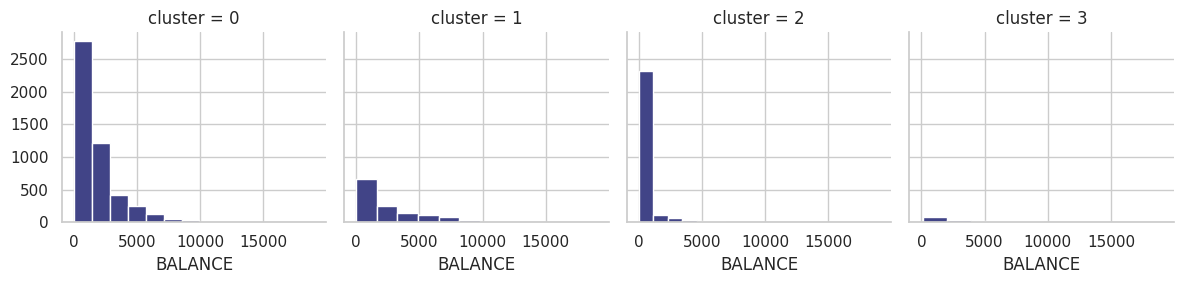

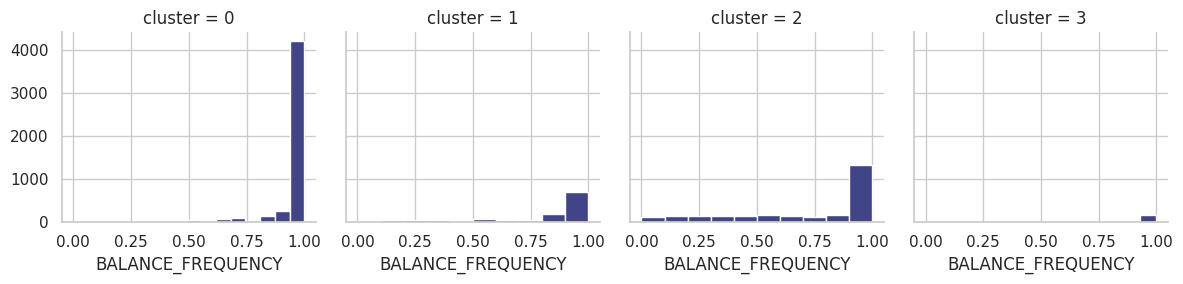

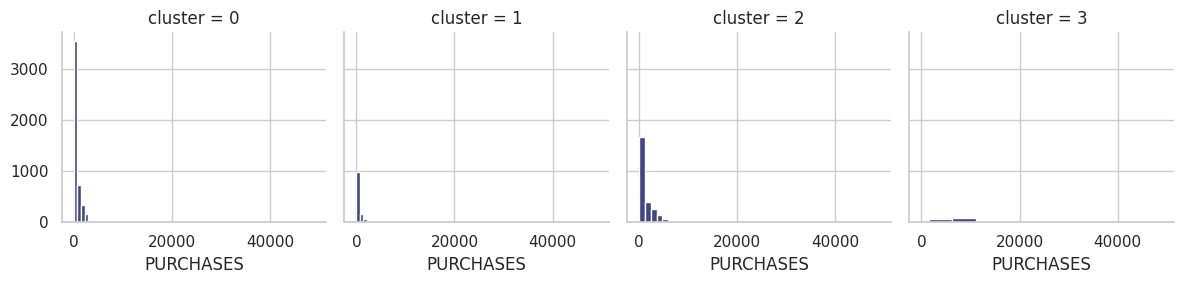

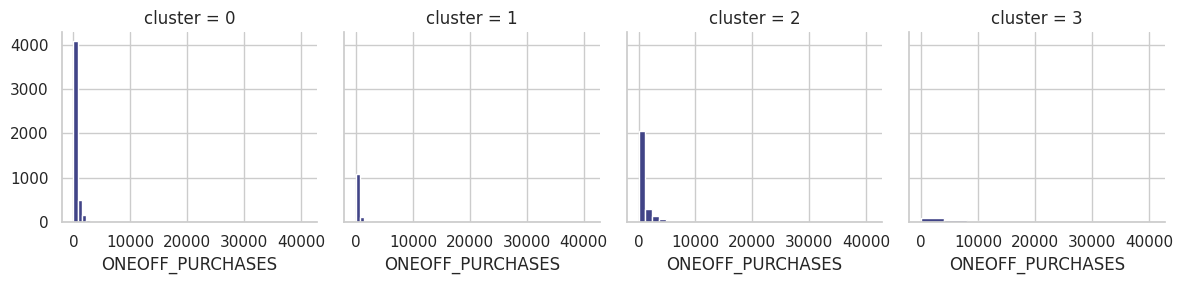

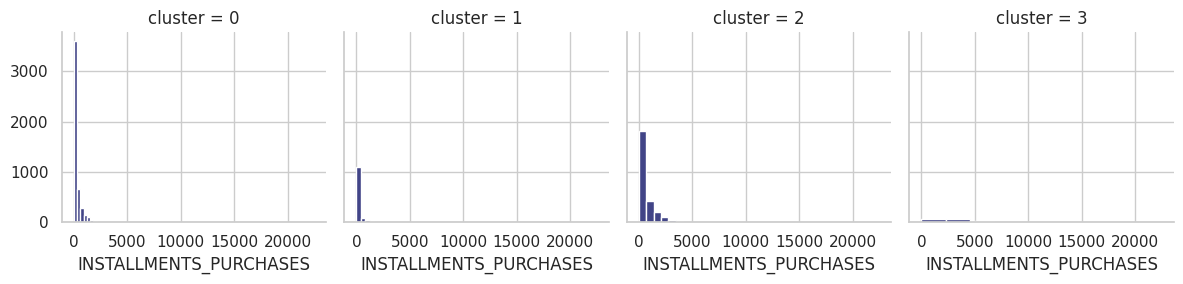

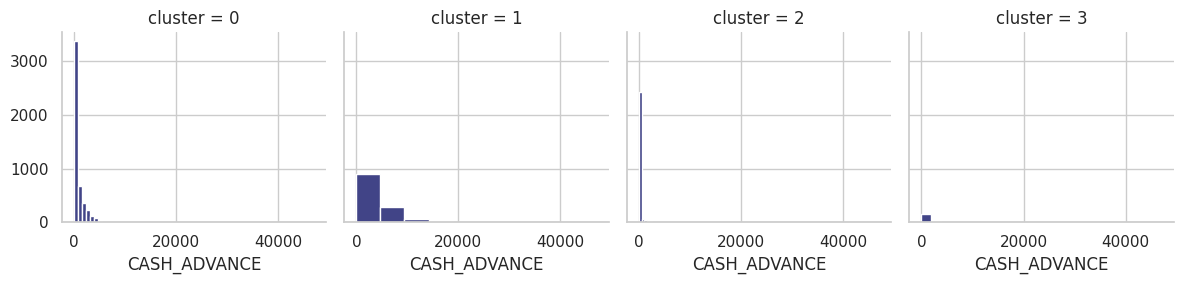

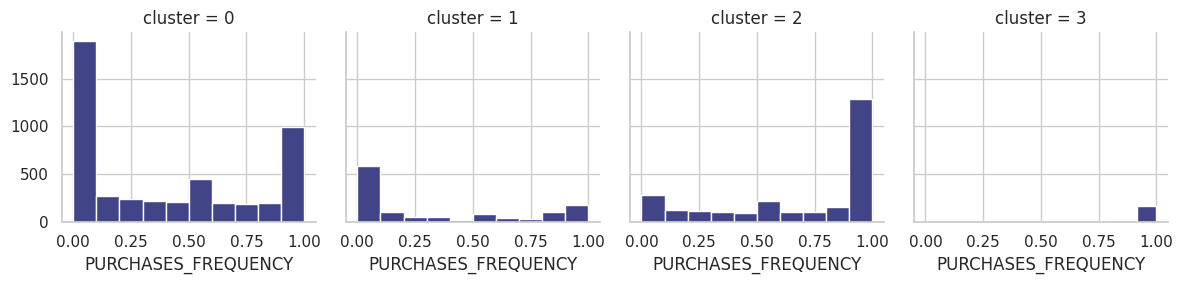

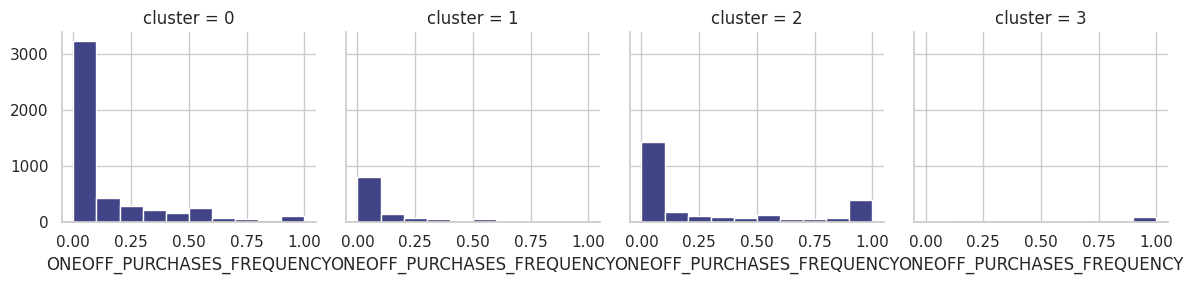

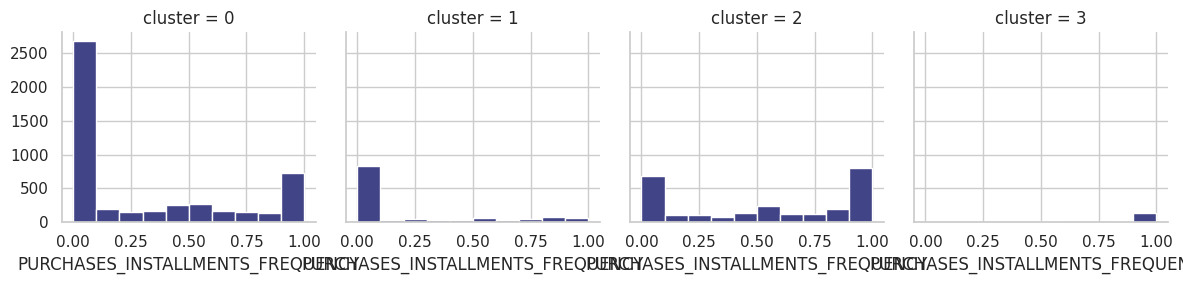

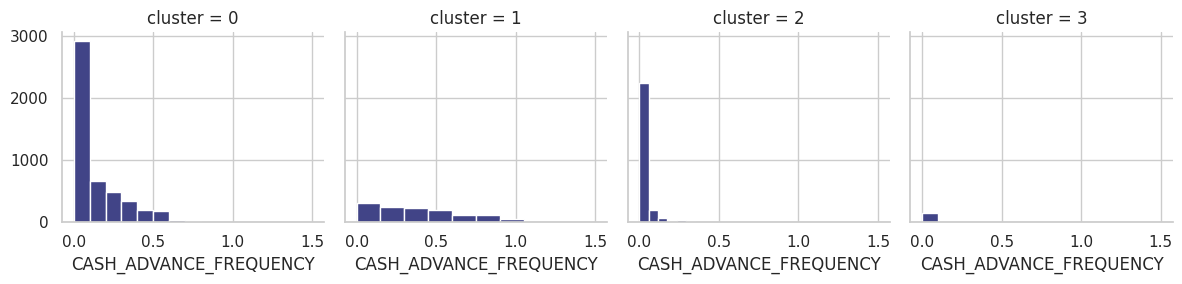

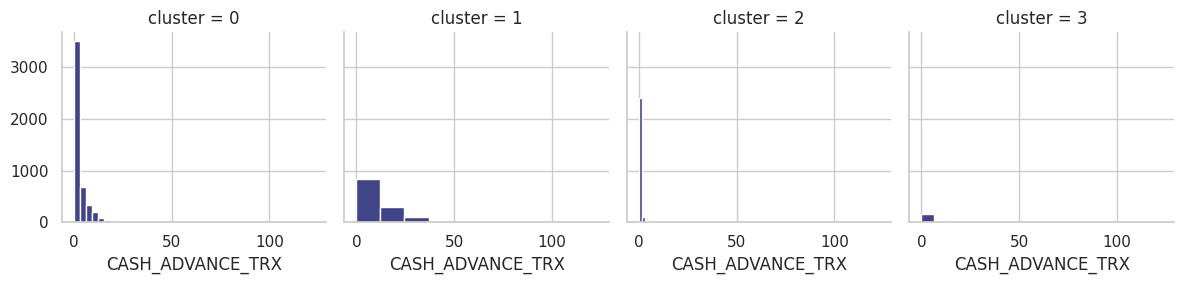

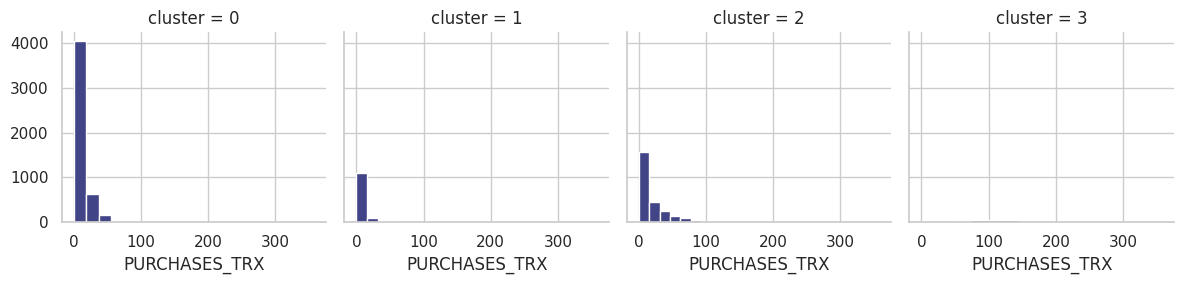

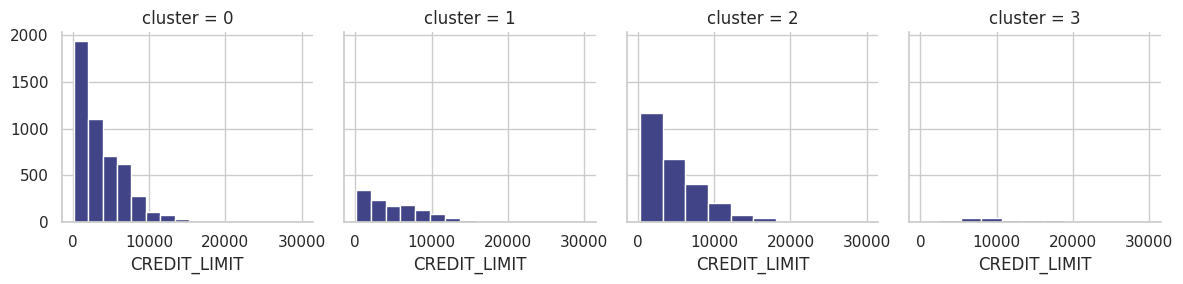

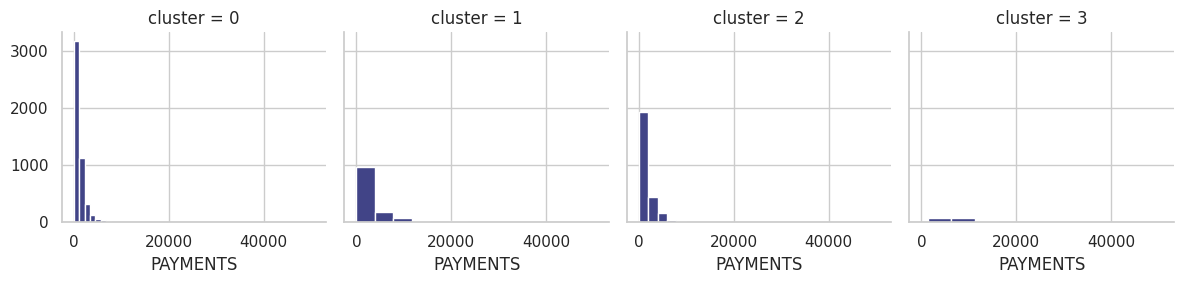

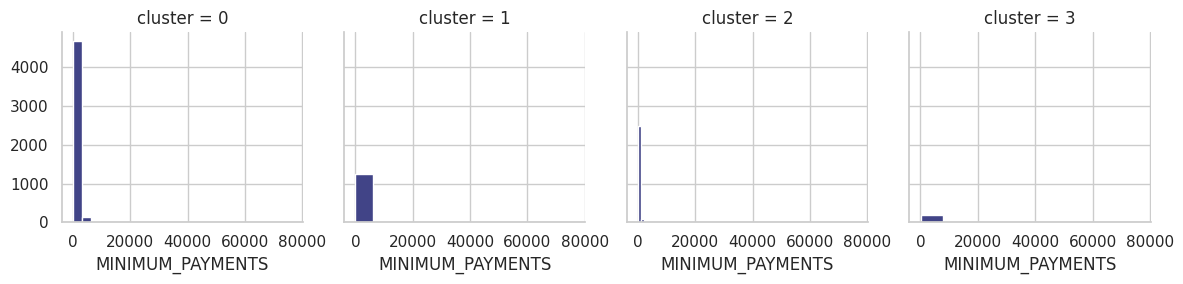

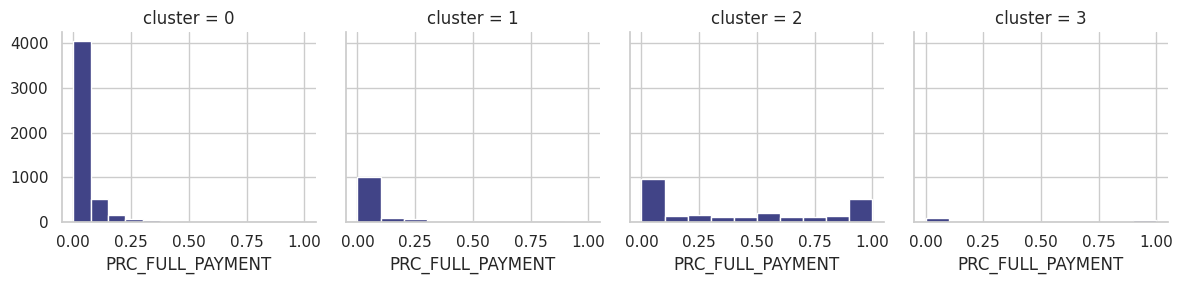

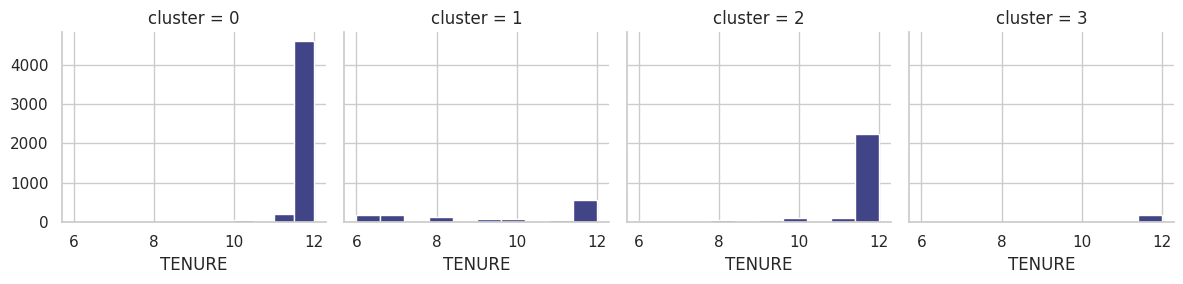

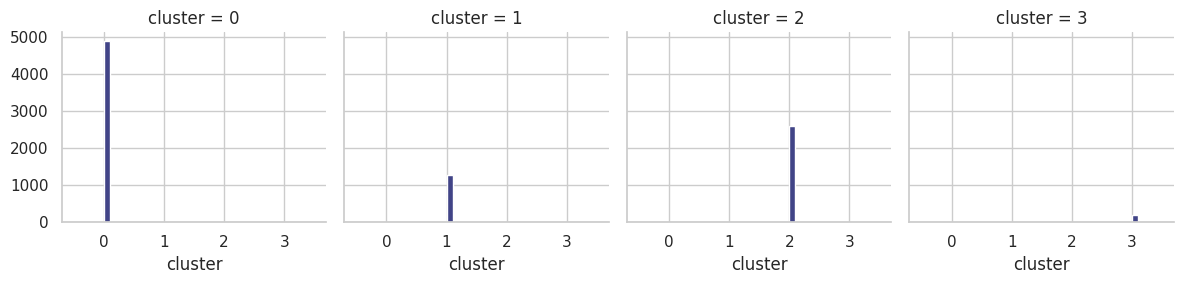

In [279]:
# Plot the histogram of various clusters
for c in df_cluster_dr:
    sns.set_style('whitegrid')
    grid= sns.FacetGrid(df_cluster_dr, col='cluster')
    grid.map(plt.hist, c)

In [268]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.374982 -0.484589
1  1.228215 -1.522149
2 -0.957713  0.388990
3 -0.963868 -0.279994
4 -1.722237 -0.578408

In [269]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.374982 -0.484589        0
1  1.228215 -1.522149        1
2 -0.957713  0.388990        0
3 -0.963868 -0.279994        0
4 -1.722237 -0.578408        0

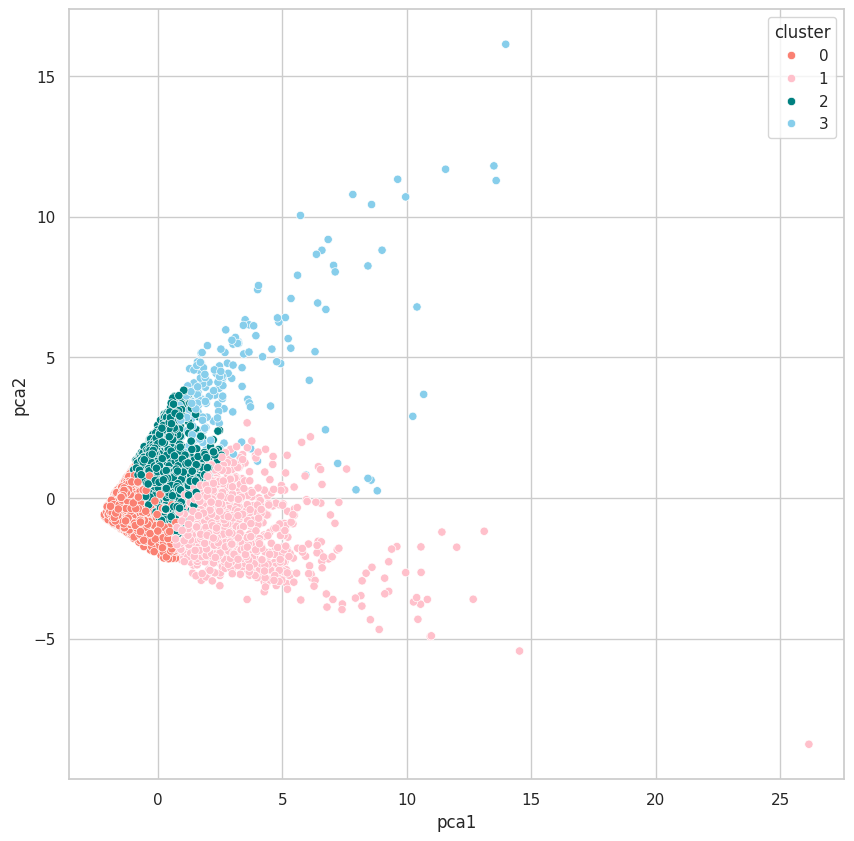

In [271]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['salmon','pink','teal', 'skyblue'])
plt.show()

# <font color=014f86 size=6>**8) Customer Segmentation Classification Prediction Model**</font>

## <font color=a67c00 size=5>**Logistic Regression**</font>

In [375]:
X = creditcard_df_cluster1.drop(columns=['cluster'])
y = creditcard_df_cluster1['cluster']

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict the customer groups for the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9955307262569832
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1839
           1       0.99      0.99      0.99       384
           2       1.00      0.99      0.99       462

    accuracy                           1.00      2685
   macro avg       1.00      0.99      0.99      2685
weighted avg       1.00      1.00      1.00      2685



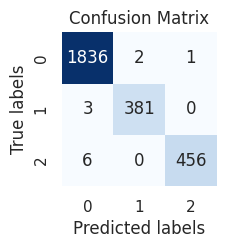

In [381]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



---



**a part of [Data Science for Business | 6 Real-world Case Studies
](https://www.udemy.com/course/data-science-for-business-6-real-world-case-studies) course**